In [1]:
# import necessary libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 
plt.style.use('fivethirtyeight') 

# display all columns 
pd.set_option('display.max_columns', None)

In [2]:
# load dataset 
path = r'C:\Users\OJO Timilehin\Documents\Portfolio Dataset\ML Classification\customer churn/Customer_Sales_Transactional_data.csv' 
churn =pd.read_csv(path) 
churn.head()

CUSTOMER_ID  Total_Sale  STD_Sales  Hist_Visits  W1_Min_Sale  W1_STD_Sales  \
0         7260    7.585687   3.988061     2.708050     4.241039      3.958143   
1        11024    6.338523   3.163263     2.302585     3.958143      2.573045   
2        12476    5.043941   0.000000     1.386294     0.000000      0.000000   
3        14156    6.648207   3.670753     1.791759     5.148657      0.000000   
4        17606    5.838896   0.000000     1.098612     5.148657      0.000000   

   W1_Visits  W2_Min_Sale  W2_STD_Sales  W2_Visits   W3_Sale  W3_Max_Sale  \
0        4.0     4.926964      3.033436        3.0  6.243390     5.552184   
1        2.0     3.958143      0.000000        1.0  5.043941     3.958143   
2        0.0     3.958143      0.000000        1.0  3.958143     3.958143   
3        1.0     5.148657      0.000000        1.0  4.461300     4.461300   
4        1.0     0.000000      0.000000        0.0  0.000000     0.000000   

   W3_Min_Sale  W3_STD_Sales  W3_Visits   W4_Sale  W4_Min_Sale  W4_STD_Sales  \
0     4.461300        4.4613        4.0  5.552184     4.461300      4.119498   
1     3.958143        0.0000        3.0  5.148657     3.958143      3.900409   
2     3.958143        0.0000        1.0  0.000000     0.000000      0.000000   
3     4.461300        0.0000        1.0  5.148657     5.148657      0.000000   
4     0.000000        0.0000        0.0  0.000000     0.000000      0.000000   

   W4_Visits  W5_STD_Sales  W5_Visits  week_1  week_2  week_3  week_4  \
0        2.0           0.0        1.0       1       1       1       1   
1        2.0           0.0        1.0       1       1       1       1   
2        0.0           0.0        1.0       0       1       1       0   
3        1.0           0.0        1.0       1       1       1       1   
4        0.0           0.0        1.0       1       0       0       0   

        APV  Days_since_last_visit  CHURN Customer_Value  High_value  \
0  4.953208               0.000000      0        Regular           0   
1  4.155335               0.000000      1        Regular           0   
2  3.958143               2.639057      1        Regular           0   
3  5.043941               1.386294      0        Regular           0   
4  5.148657               1.609438      1        Regular           0   

   Low_value  Regular     Visitors_Type  Rare_Visitors  Frequent_Visitors  \
0          0        1  Regular_Visitors              0                  0   
1          0        1  Regular_Visitors              0                  0   
2          0        1  Regular_Visitors              1                  0   
3          0        1  Regular_Visitors              1                  0   
4          0        1  Regular_Visitors              1                  0   

   Regular_Visitors  
0                 1  
1                 1  
2                 0  
3                 0  
4                 0

In [3]:
# Number of null values per column 
churn.isnull().sum()

CUSTOMER_ID              0
Total_Sale               0
STD_Sales                0
Hist_Visits              0
W1_Min_Sale              0
W1_STD_Sales             0
W1_Visits                0
W2_Min_Sale              0
W2_STD_Sales             0
W2_Visits                0
W3_Sale                  0
W3_Max_Sale              0
W3_Min_Sale              0
W3_STD_Sales             0
W3_Visits                0
W4_Sale                  0
W4_Min_Sale              0
W4_STD_Sales             0
W4_Visits                0
W5_STD_Sales             0
W5_Visits                0
week_1                   0
week_2                   0
week_3                   0
week_4                   0
APV                      0
Days_since_last_visit    0
CHURN                    0
Customer_Value           0
High_value               0
Low_value                0
Regular                  0
Visitors_Type            0
Rare_Visitors            0
Frequent_Visitors        0
Regular_Visitors         0
dtype: int64

- No null values.  A cleaned dataset

In [4]:
# column data type 
churn.dtypes

CUSTOMER_ID                int64
Total_Sale               float64
STD_Sales                float64
Hist_Visits              float64
W1_Min_Sale              float64
W1_STD_Sales             float64
W1_Visits                float64
W2_Min_Sale              float64
W2_STD_Sales             float64
W2_Visits                float64
W3_Sale                  float64
W3_Max_Sale              float64
W3_Min_Sale              float64
W3_STD_Sales             float64
W3_Visits                float64
W4_Sale                  float64
W4_Min_Sale              float64
W4_STD_Sales             float64
W4_Visits                float64
W5_STD_Sales             float64
W5_Visits                float64
week_1                     int64
week_2                     int64
week_3                     int64
week_4                     int64
APV                      float64
Days_since_last_visit    float64
CHURN                      int64
Customer_Value            object
High_value                 int64
Low_value 

In [5]:
# Number of unique values per column 
for feature in churn.columns: 
    print(feature, ' :', churn[feature].nunique(), ', ', churn[feature].dtype)

CUSTOMER_ID  : 91698 ,  int64
Total_Sale  : 1703 ,  float64
STD_Sales  : 18214 ,  float64
Hist_Visits  : 33 ,  float64
W1_Min_Sale  : 185 ,  float64
W1_STD_Sales  : 1427 ,  float64
W1_Visits  : 8 ,  float64
W2_Min_Sale  : 202 ,  float64
W2_STD_Sales  : 1461 ,  float64
W2_Visits  : 8 ,  float64
W3_Sale  : 456 ,  float64
W3_Max_Sale  : 236 ,  float64
W3_Min_Sale  : 195 ,  float64
W3_STD_Sales  : 1846 ,  float64
W3_Visits  : 8 ,  float64
W4_Sale  : 398 ,  float64
W4_Min_Sale  : 172 ,  float64
W4_STD_Sales  : 1458 ,  float64
W4_Visits  : 8 ,  float64
W5_STD_Sales  : 852 ,  float64
W5_Visits  : 5 ,  float64
week_1  : 2 ,  int64
week_2  : 2 ,  int64
week_3  : 2 ,  int64
week_4  : 2 ,  int64
APV  : 4758 ,  float64
Days_since_last_visit  : 33 ,  float64
CHURN  : 2 ,  int64
Customer_Value  : 3 ,  object
High_value  : 2 ,  int64
Low_value  : 2 ,  int64
Regular  : 2 ,  int64
Visitors_Type  : 3 ,  object
Rare_Visitors  : 2 ,  int64
Frequent_Visitors  : 2 ,  int64
Regular_Visitors  : 2 ,  int64


In [6]:
# dataset description
churn.describe()

CUSTOMER_ID    Total_Sale     STD_Sales   Hist_Visits   W1_Min_Sale  \
count  9.169800e+04  91698.000000  91698.000000  91698.000000  91698.000000   
mean   5.913056e+08      6.429190      2.764595      1.872964      3.183335   
std    4.828577e+08      0.910333      1.765439      0.599162      2.215520   
min    7.260000e+03      0.000000      0.000000      0.693147      0.000000   
25%    8.954630e+07      5.838896      0.000000      1.386294      0.000000   
50%    7.879843e+08      6.530586      3.334669      1.945910      4.241039   
75%    1.080223e+09      7.103750      4.013917      2.302585      4.641695   
max    1.203061e+09      9.966864      8.522151      3.526361      9.561502   

       W1_STD_Sales     W1_Visits   W2_Min_Sale  W2_STD_Sales     W2_Visits  \
count  91698.000000  91698.000000  91698.000000  91698.000000  91698.000000   
mean       0.817102      1.268795      3.224033      0.835525      1.298502   
std        1.592447      1.249975      2.189890      1.603579      1.260308   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      1.000000      4.241039      0.000000      1.000000   
75%        0.000000      2.000000      4.641695      0.000000      2.000000   
max        7.608989      7.000000      8.806544      8.015465      7.000000   

            W3_Sale   W3_Max_Sale   W3_Min_Sale  W3_STD_Sales     W3_Visits  \
count  91698.000000  91698.000000  91698.000000  91698.000000  91698.000000   
mean       3.923739      3.611162      3.414145      1.020534      1.475485   
std        2.420795      2.212551      2.094491      1.731244      1.338829   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        5.148657      4.461300      4.357222      0.000000      1.000000   
75%        5.676891      5.148657      4.794467      2.573045      2.000000   
max        8.831858      8.544225      8.544225      7.641648      7.000000   

            W4_Sale   W4_Min_Sale  W4_STD_Sales     W4_Visits  W5_STD_Sales  \
count  91698.000000  91698.000000  91698.000000  91698.000000  91698.000000   
mean       3.598403      3.176977      0.829101      1.295034      0.648906   
std        2.493299      2.193272      1.590588      1.272411      1.454881   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        4.641695      4.241039      0.000000      1.000000      0.000000   
75%        5.552184      4.641695      0.000000      2.000000      0.000000   
max        8.698347      8.544225      7.687089      7.000000      7.608006   

          W5_Visits        week_1        week_2        week_3        week_4  \
count  91698.000000  91698.000000  91698.000000  91698.000000  91698.000000   
mean       1.397817      0.684595      0.695173      0.737988      0.687769   
std        0.713177      0.464679      0.460337      0.439732      0.463406   
min        1.000000      0.000000      0.000000      0.000000      0.000000   
25%        1.000000      0.000000      0.000000      0.000000      0.000000   
50%        1.000000      1.000000      1.000000      1.000000      1.000000   
75%        2.000000      1.000000      1.000000      1.000000      1.000000   
max        5.000000      1.000000      1.000000      1.000000      1.000000   

                APV  Days_since_last_visit         CHURN    High_value  \
count  91698.000000           91698.000000  91698.000000  91698.000000   
mean       4.778903               1.513731      0.331032      0.000611   
std        0.541192               1.060635      0.470587      0.024705   
min        0.000000               0.000000      0.000000      0.000000   
25%        4.393131               0.693147      0.000000      0.000000   
50% 

## Exploratory Data Analysis

### Target Varibale

In [7]:
# value count percentage
churn['CHURN'].value_counts(normalize = True)

0    0.668968
1    0.331032
Name: CHURN, dtype: float64

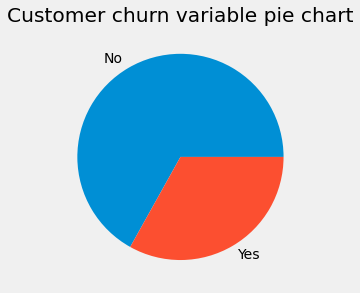

In [8]:
# pie chart
slices = churn['CHURN'].value_counts(normalize = True) 
labels = ['No', 'Yes']
plt.pie(slices, labels=labels) 
plt.tight_layout() 
plt.title('Customer churn variable pie chart')
plt.show()

### Numerical variable 
- Numerical features in this dataset are the columns with unique values greater than 8, irrespective of the datatype they are. 


In [9]:
# list comprehension
num_var = [feature for feature in churn.columns if churn[feature]. nunique() > 9]
num_var

['CUSTOMER_ID',
 'Total_Sale',
 'STD_Sales',
 'Hist_Visits',
 'W1_Min_Sale',
 'W1_STD_Sales',
 'W2_Min_Sale',
 'W2_STD_Sales',
 'W3_Sale',
 'W3_Max_Sale',
 'W3_Min_Sale',
 'W3_STD_Sales',
 'W4_Sale',
 'W4_Min_Sale',
 'W4_STD_Sales',
 'W5_STD_Sales',
 'APV',
 'Days_since_last_visit']

### Histogram Distribution plot

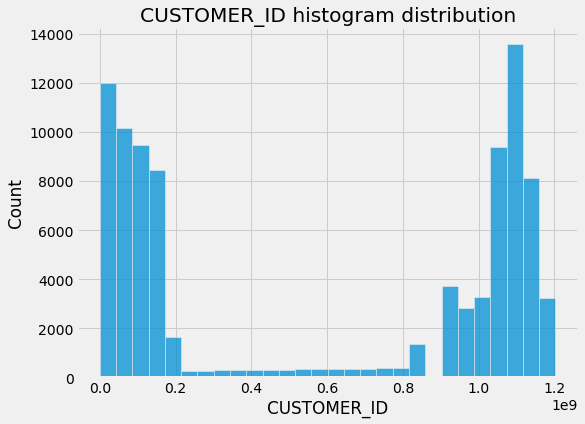

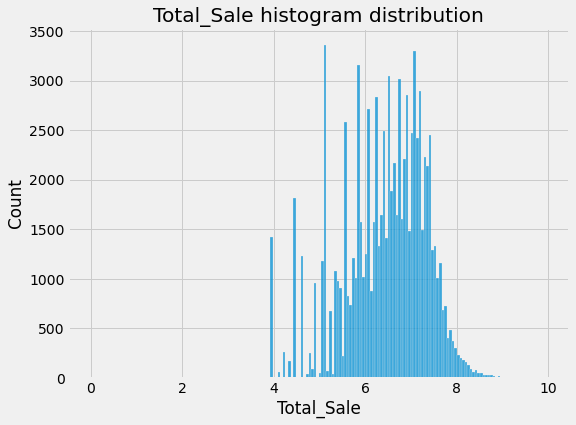

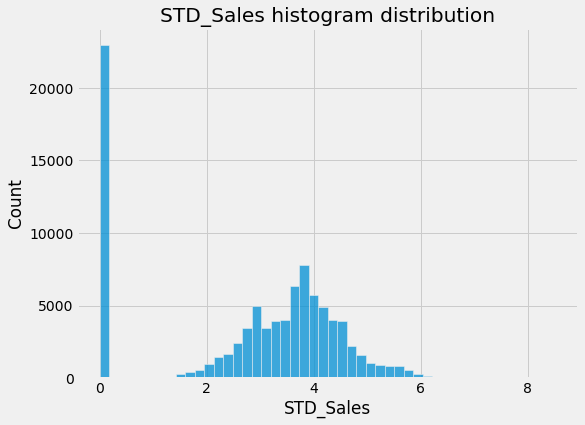

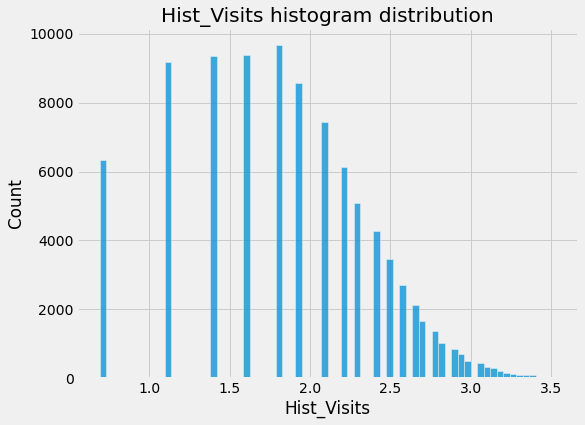

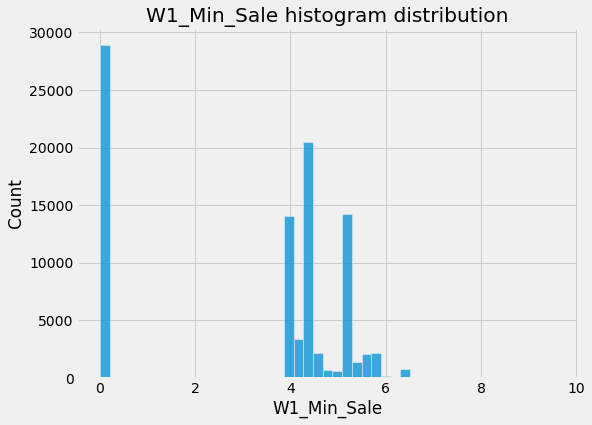

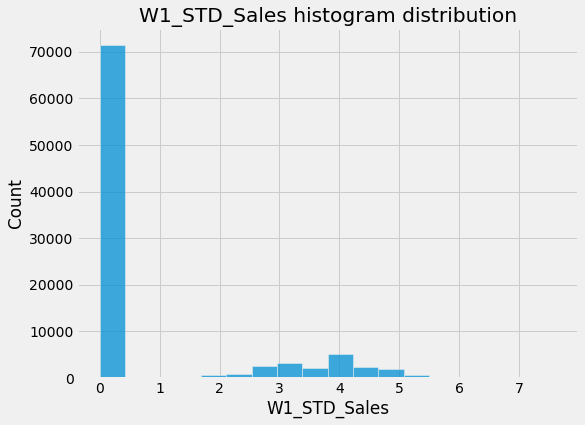

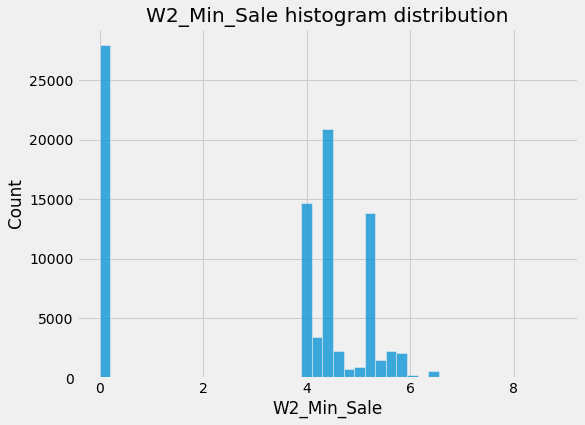

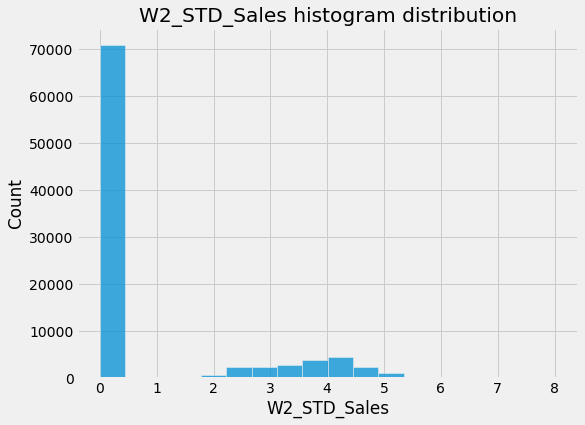

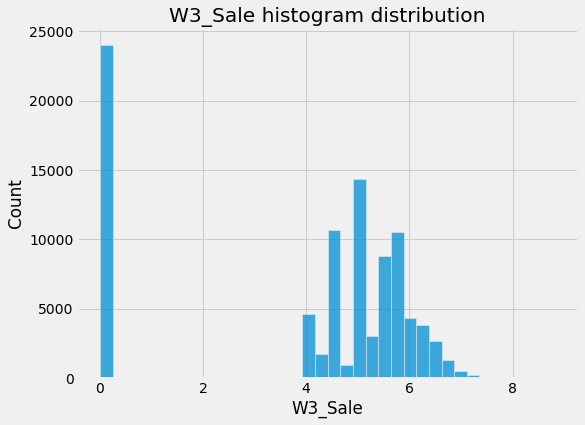

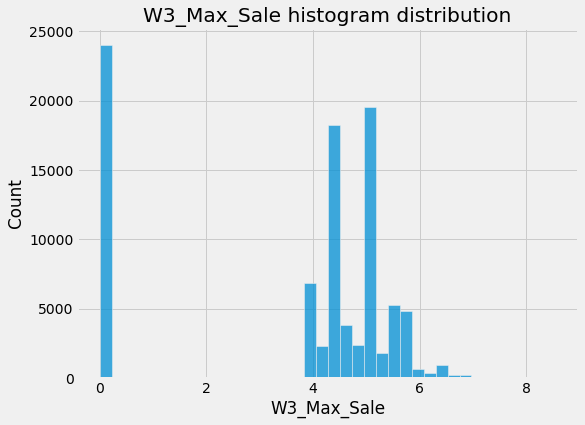

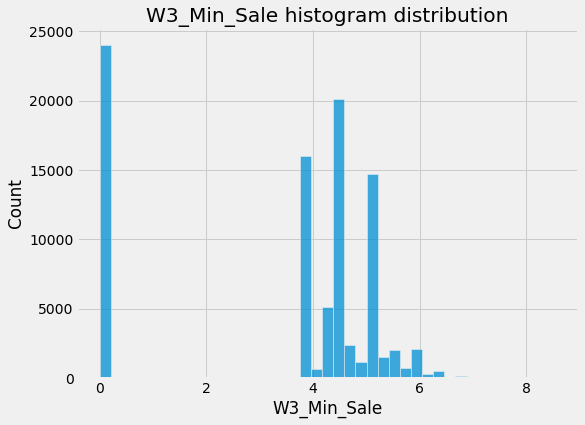

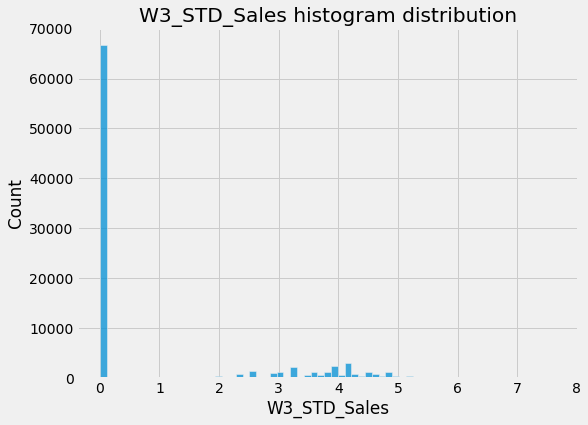

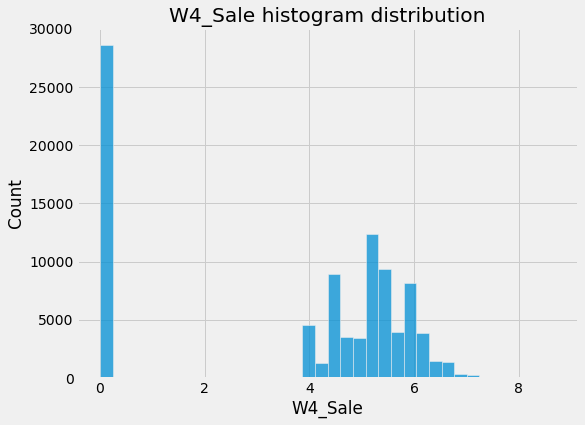

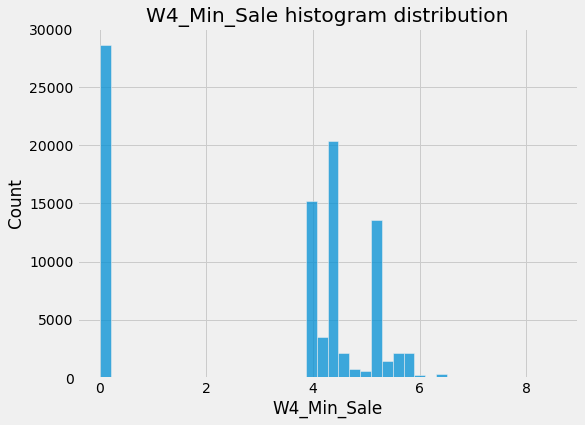

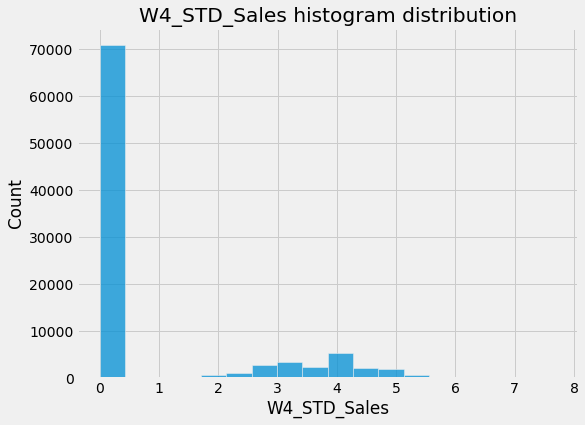

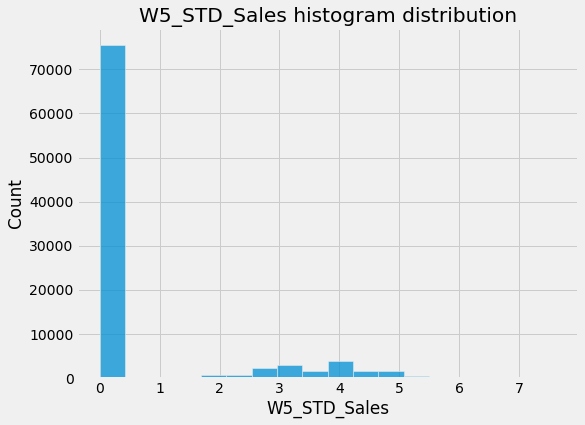

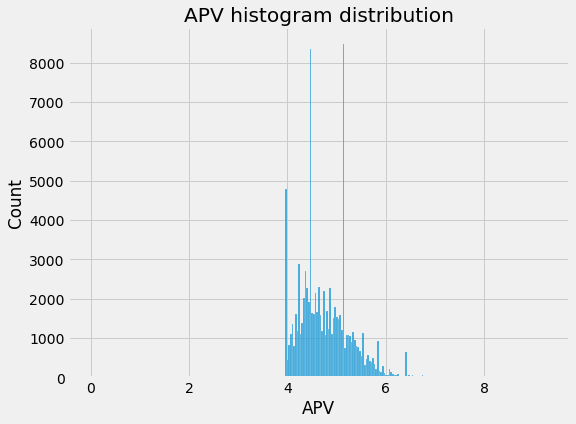

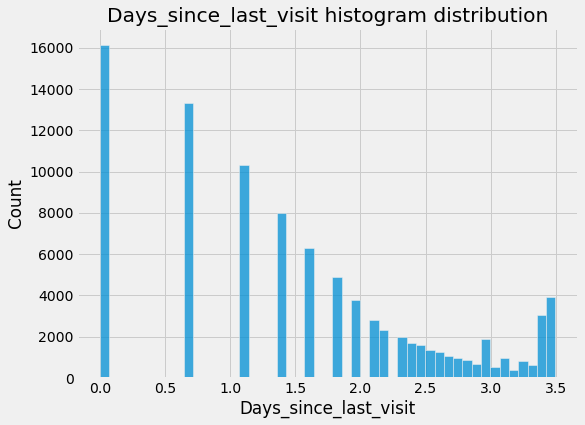

In [10]:
# for loop 
for feature in num_var: 
    # make a copy of the dataframe
    data = churn.copy() 
    # plot a distribution plot 
    plt.figure(figsize = (8, 6))
    sns.histplot(data[feature]) 
    plt.title(f'{feature} histogram distribution')
    plt.show()

### Boxplot 
- To reveal the outliers in each variable

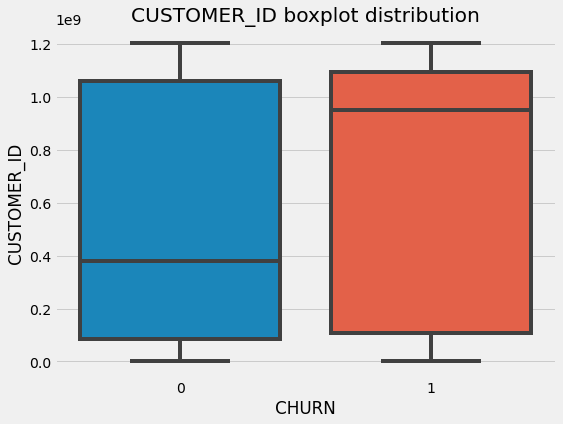

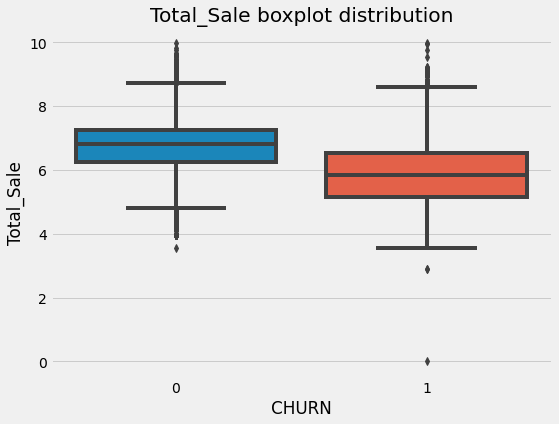

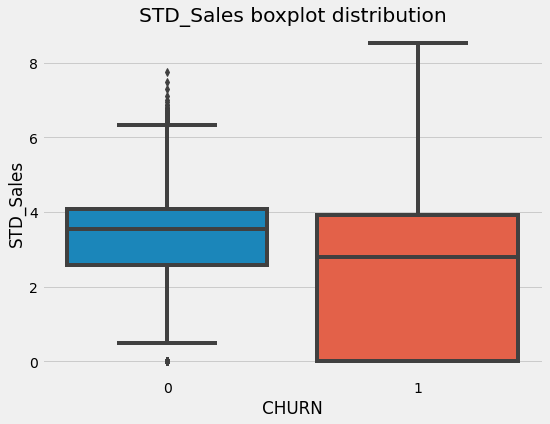

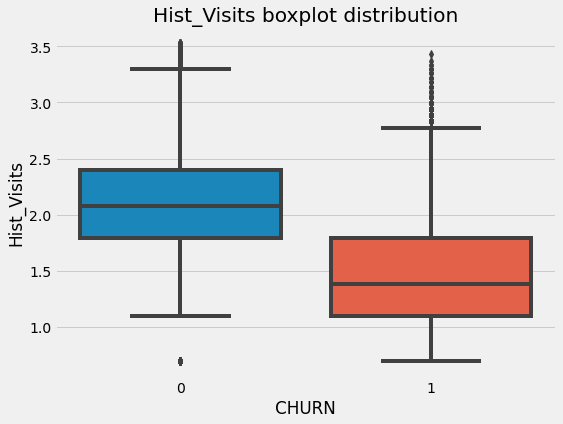

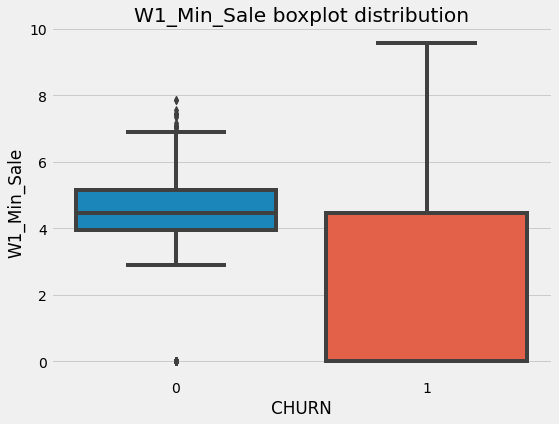

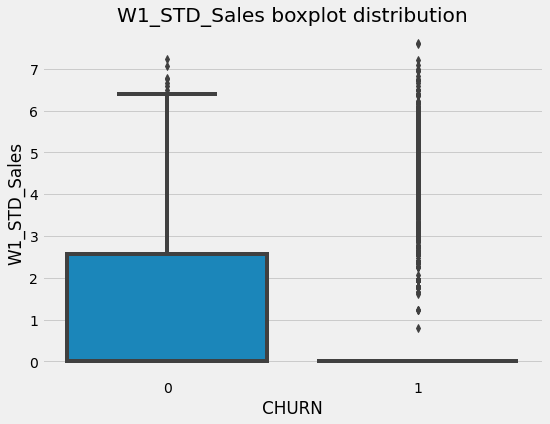

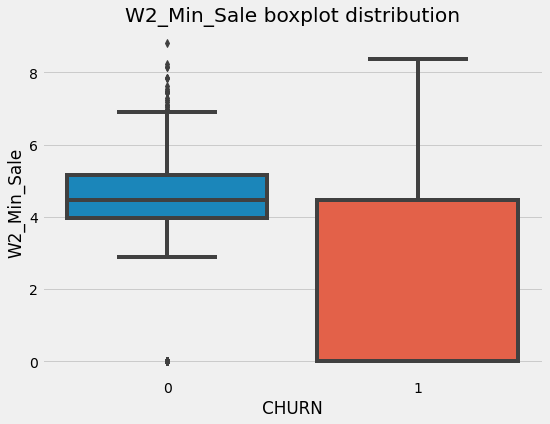

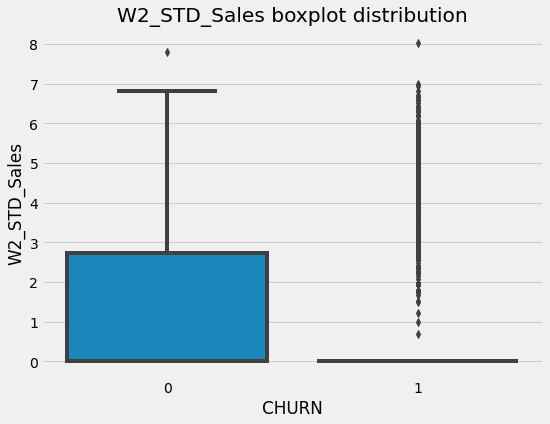

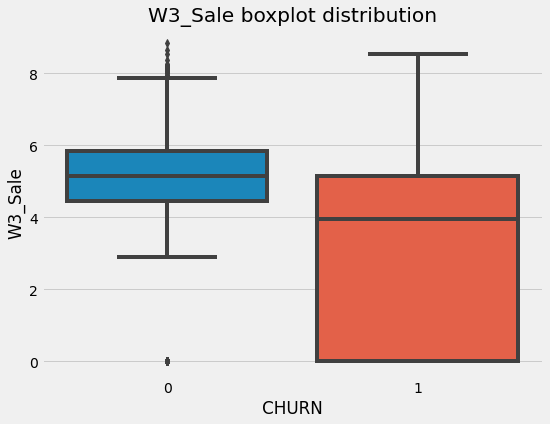

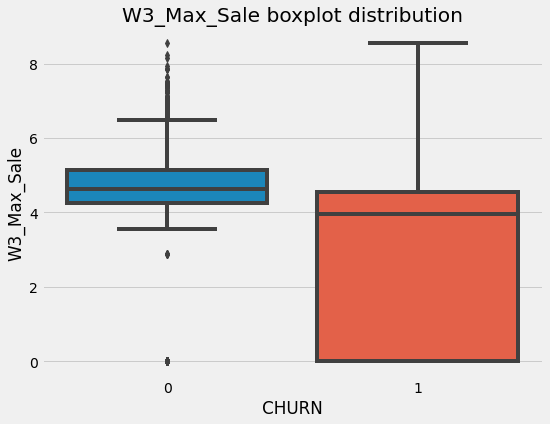

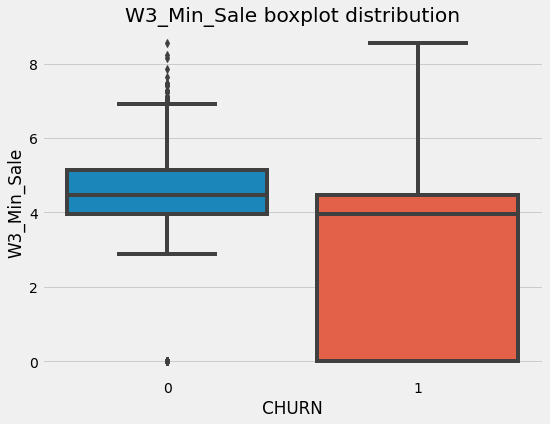

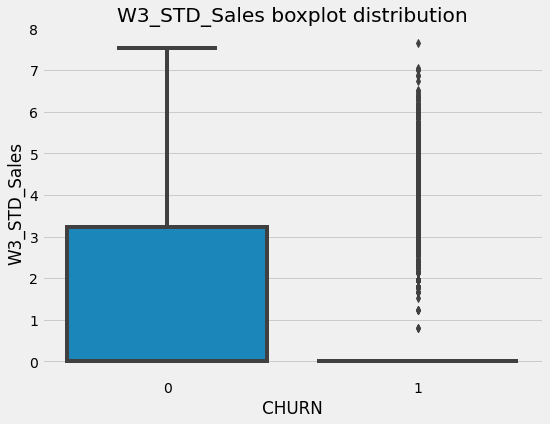

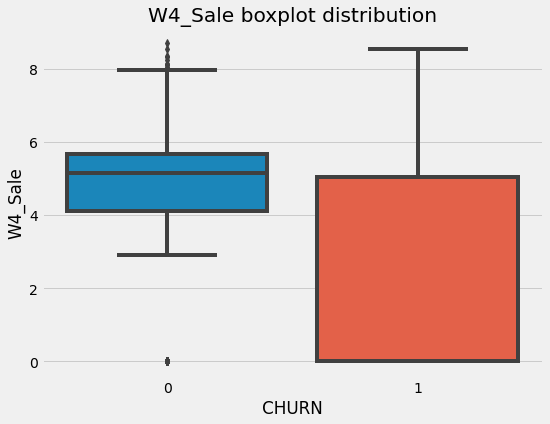

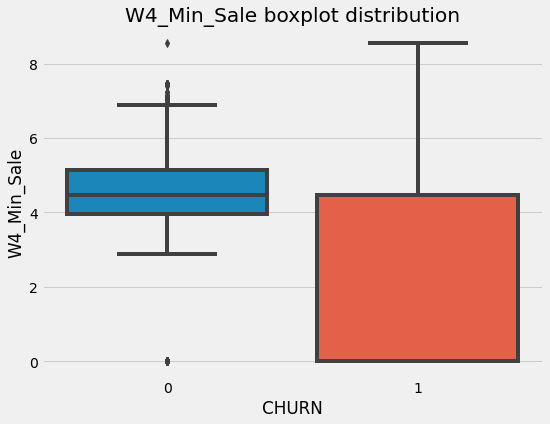

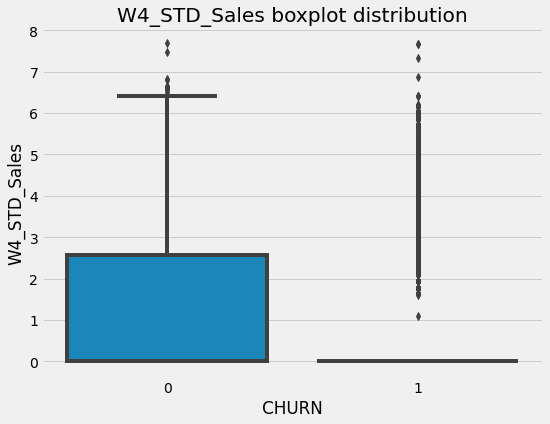

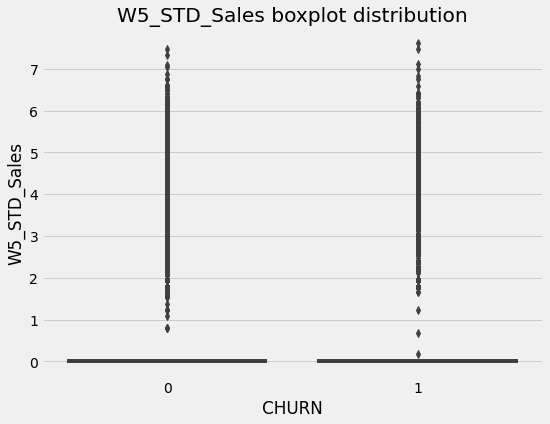

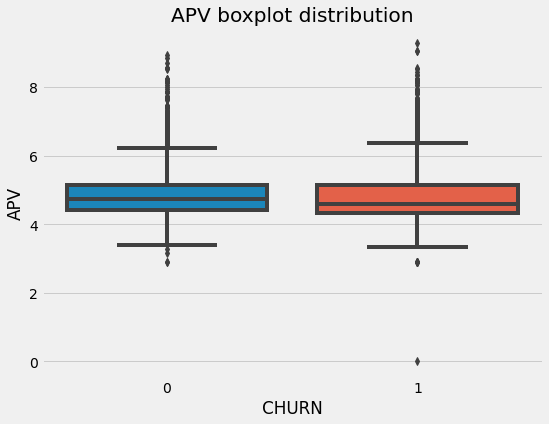

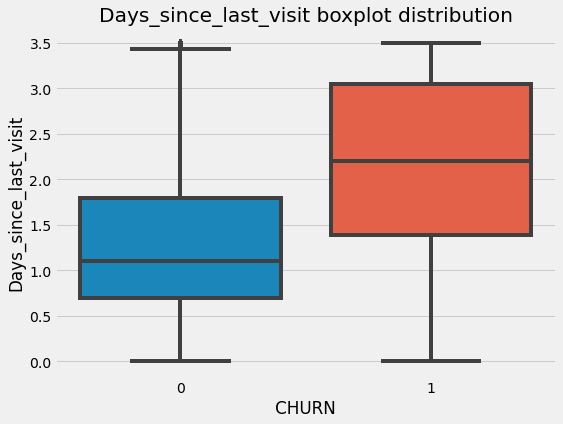

In [11]:
# for loop 
for feature in num_var:
    # make a copy of the dataframe
    data = churn.copy()
    # plot a boxplot 
    plt.figure(figsize = (8, 6))
    sns.boxplot(x="CHURN", y=feature, data=data) 
    plt.title(f'{feature} boxplot distribution')
    plt.show()

### Numerical Variable vs Churn

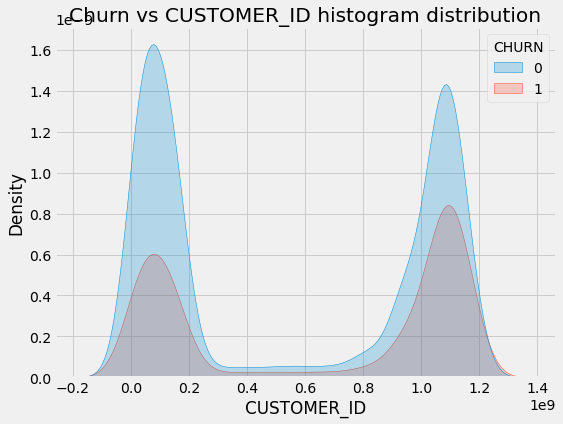

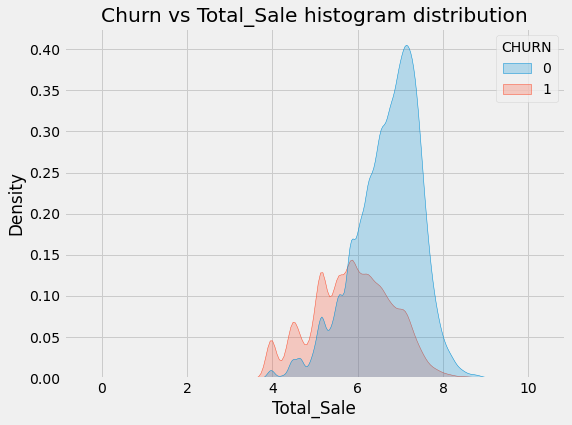

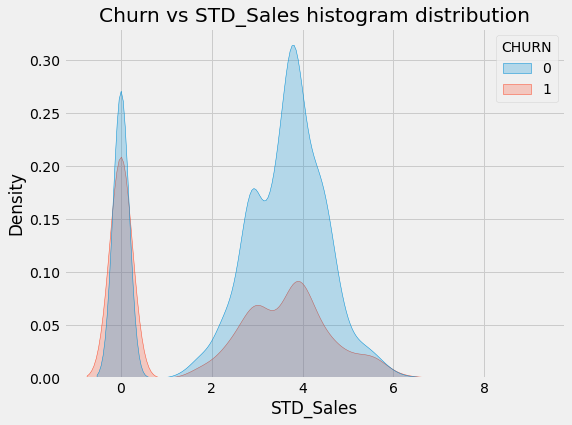

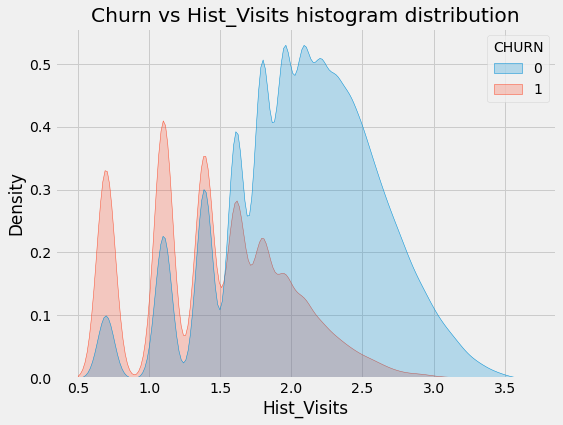

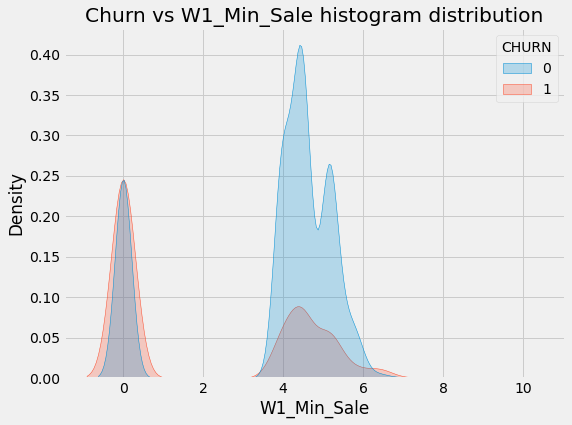

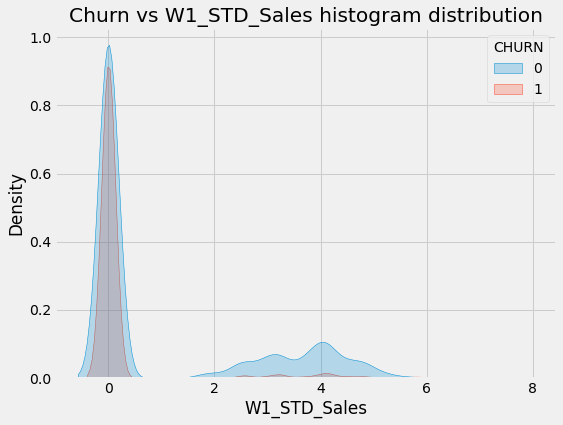

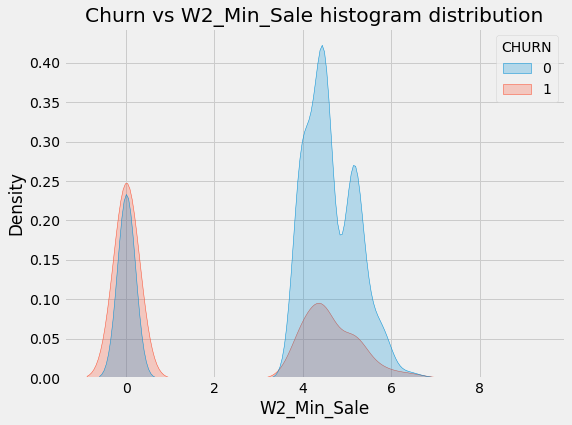

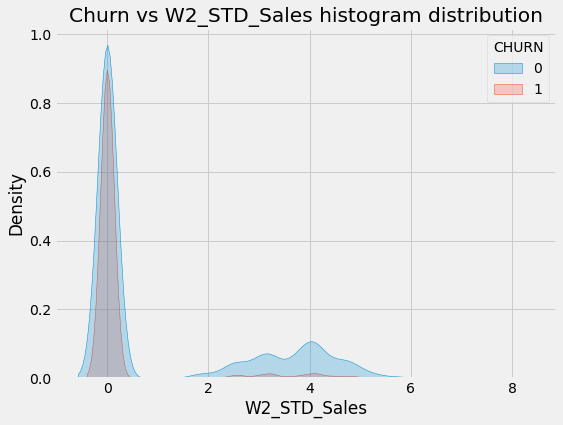

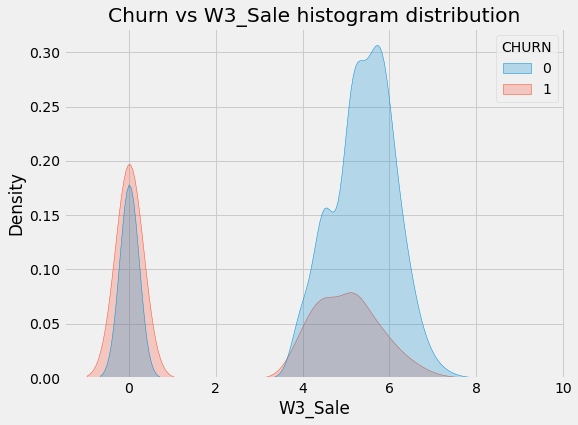

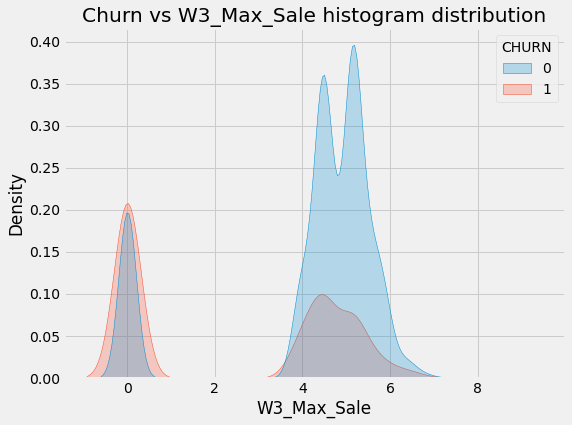

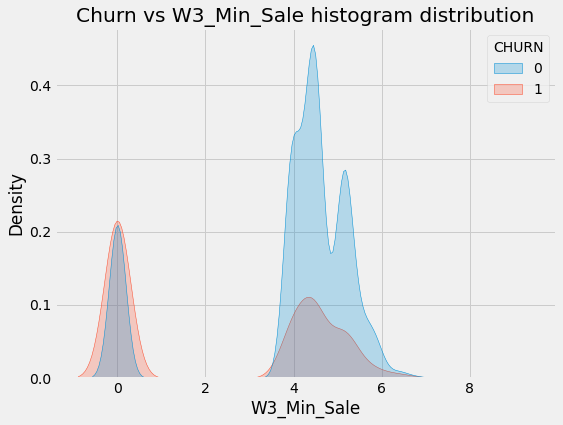

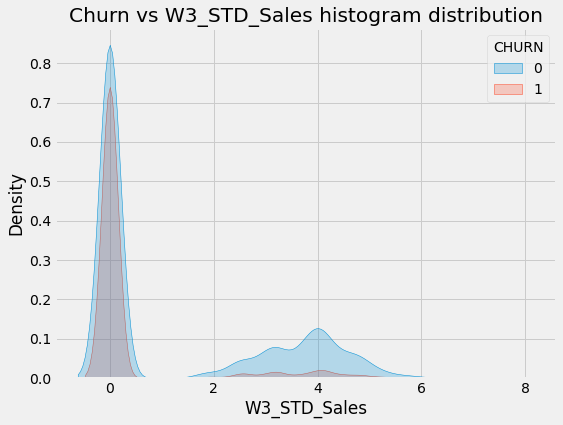

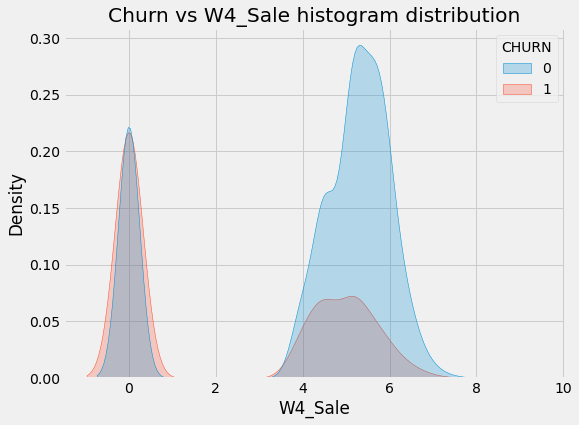

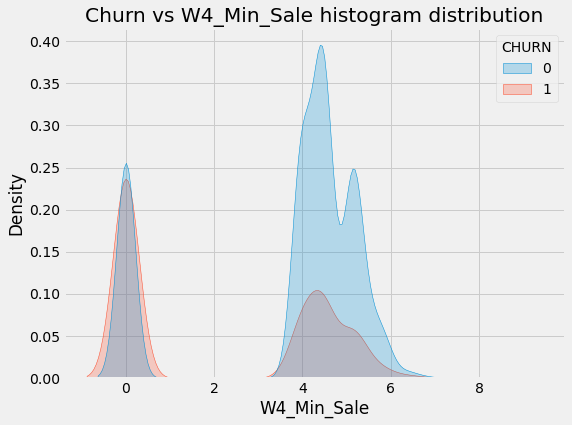

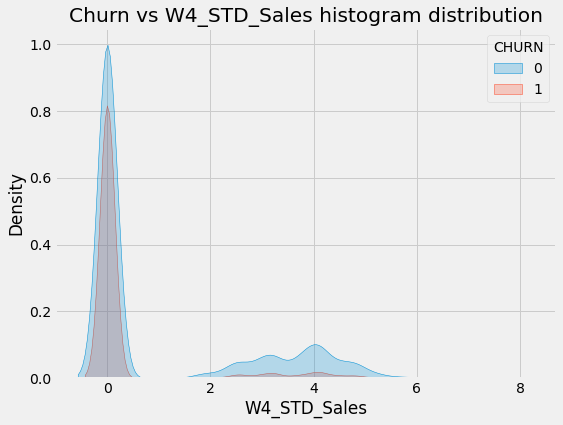

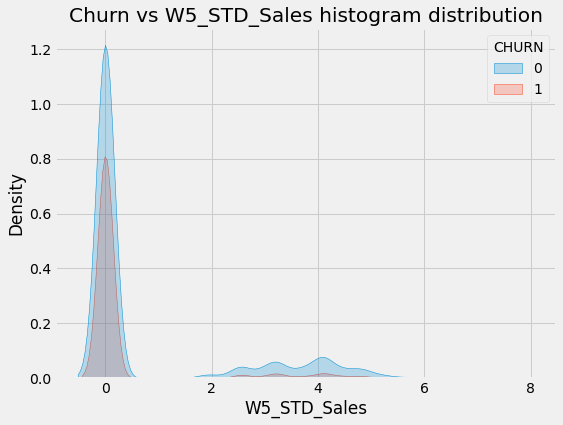

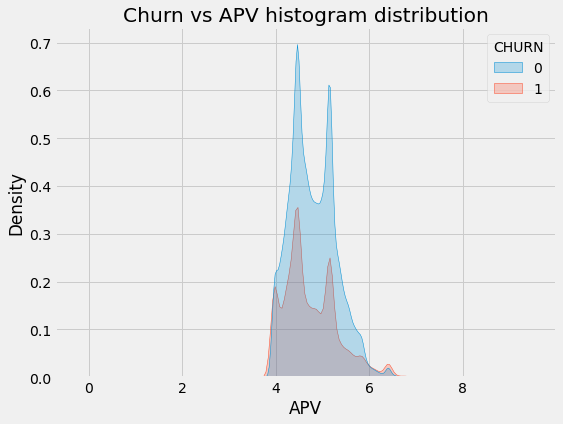

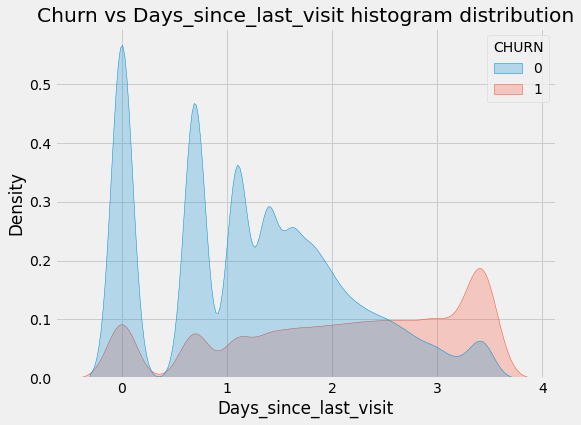

In [12]:
# for loop 
for feature in num_var: 
    # make a copy of the dataframe
    data = churn.copy() 
    # plot a distribution plot 
    plt.figure(figsize = (8, 6))
    sns.kdeplot(data[feature], hue = data['CHURN'], shade = True) 
    plt.title(f'Churn vs {feature} histogram distribution')
    plt.show()

### Pairplot

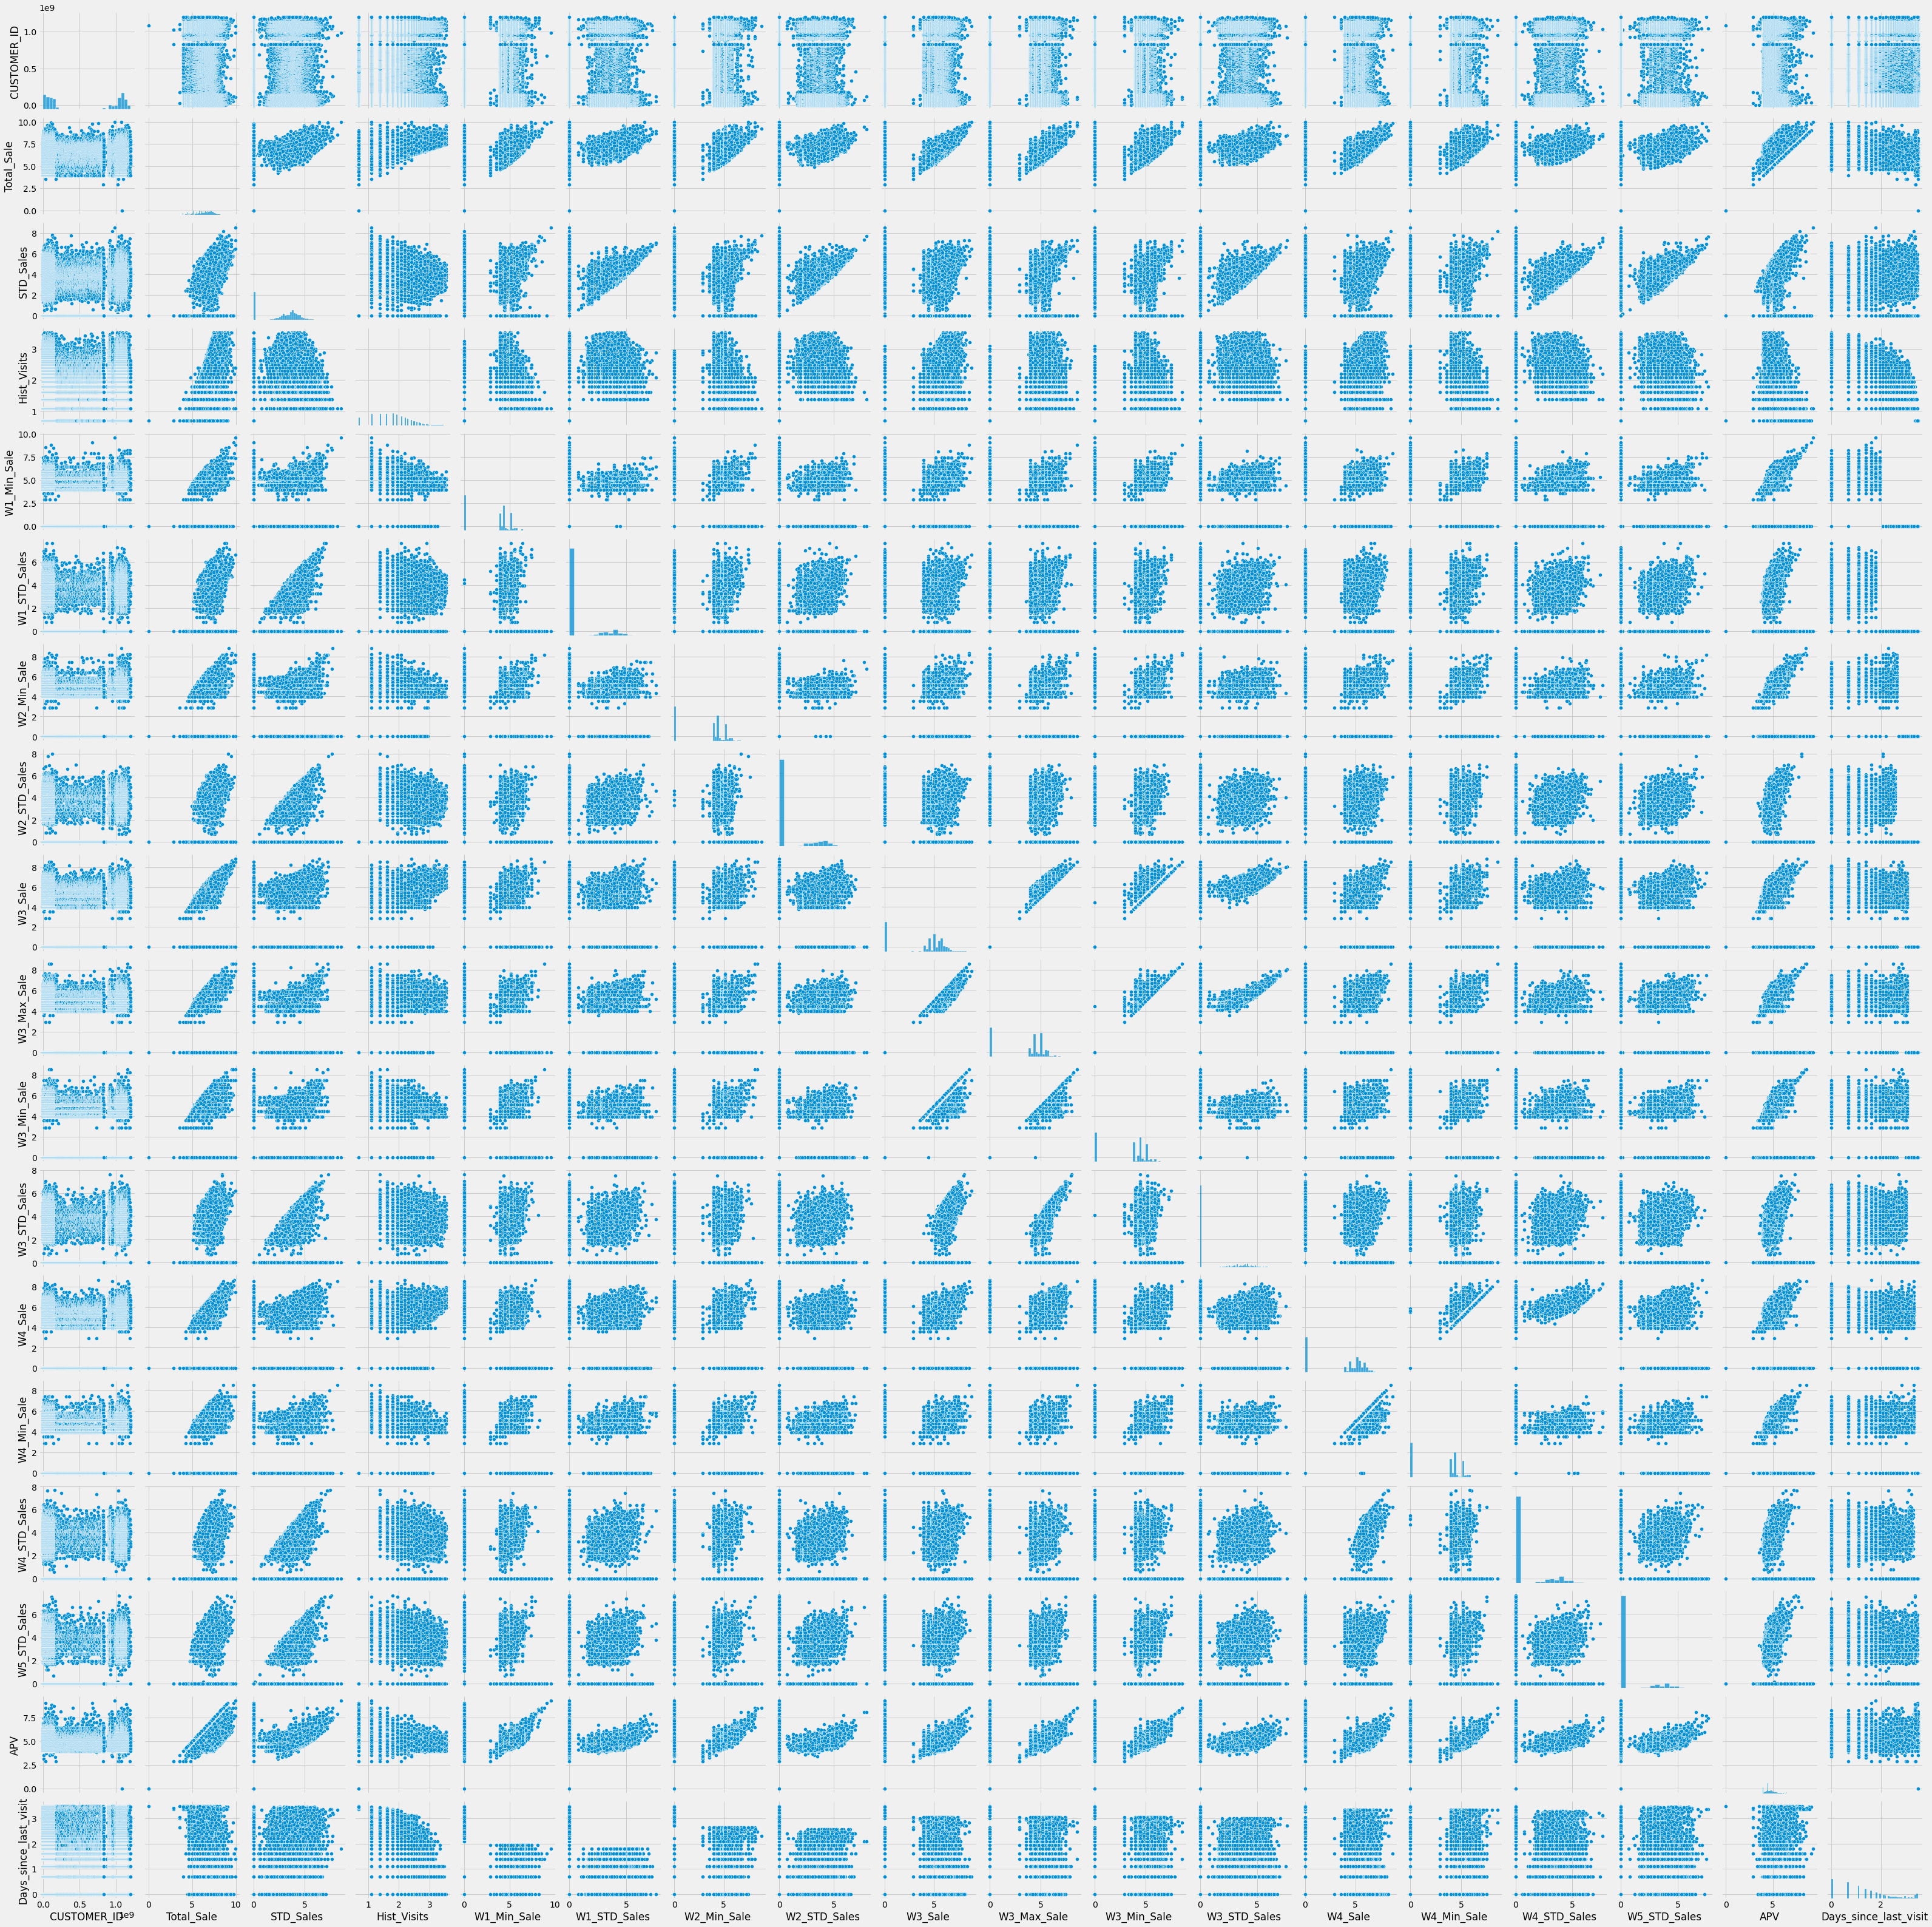

In [13]:
sns.pairplot(churn[num_var])

### Categorical Variables 
- Categorical features in this dataset are the columns with unique values equal to or lesser than 8, irrespective of the datatype they are.

In [14]:
cat_var = [feature for feature in churn.columns if churn[feature].nunique() <= 8]
cat_var

['W1_Visits',
 'W2_Visits',
 'W3_Visits',
 'W4_Visits',
 'W5_Visits',
 'week_1',
 'week_2',
 'week_3',
 'week_4',
 'CHURN',
 'Customer_Value',
 'High_value',
 'Low_value',
 'Regular',
 'Visitors_Type',
 'Rare_Visitors',
 'Frequent_Visitors',
 'Regular_Visitors']

In [15]:
# Number of unique values 
for feature in cat_var:
    data = churn.copy()
    print(f'{feature} : {data[feature].nunique()} unique values')

W1_Visits : 8 unique values
W2_Visits : 8 unique values
W3_Visits : 8 unique values
W4_Visits : 8 unique values
W5_Visits : 5 unique values
week_1 : 2 unique values
week_2 : 2 unique values
week_3 : 2 unique values
week_4 : 2 unique values
CHURN : 2 unique values
Customer_Value : 3 unique values
High_value : 2 unique values
Low_value : 2 unique values
Regular : 2 unique values
Visitors_Type : 3 unique values
Rare_Visitors : 2 unique values
Frequent_Visitors : 2 unique values
Regular_Visitors : 2 unique values


### Cardinality of the Catgorical Variables 

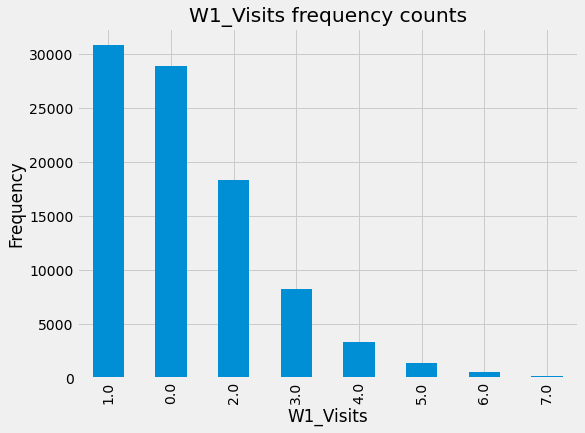

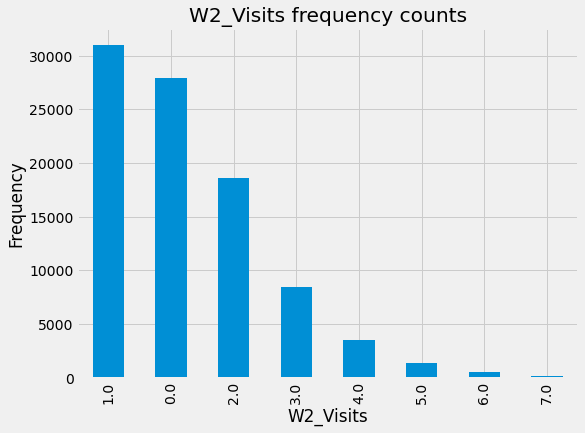

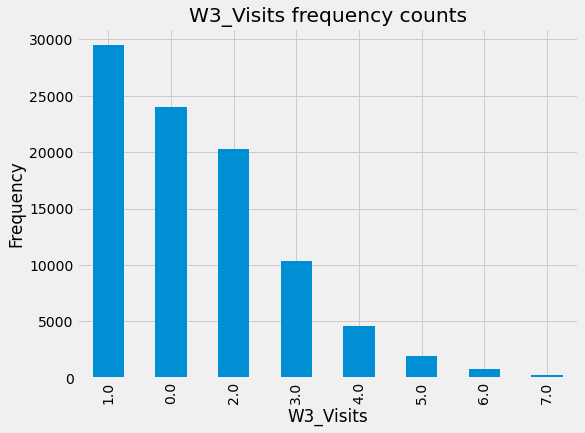

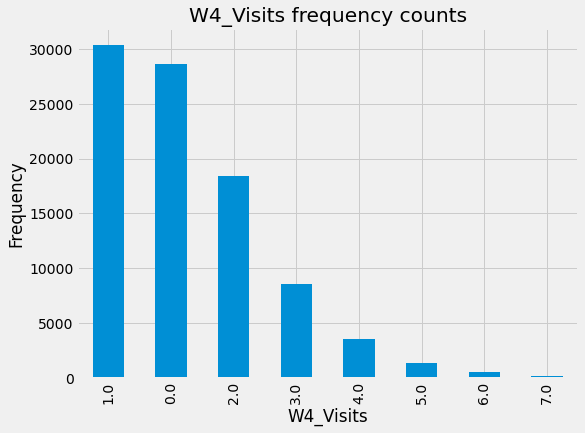

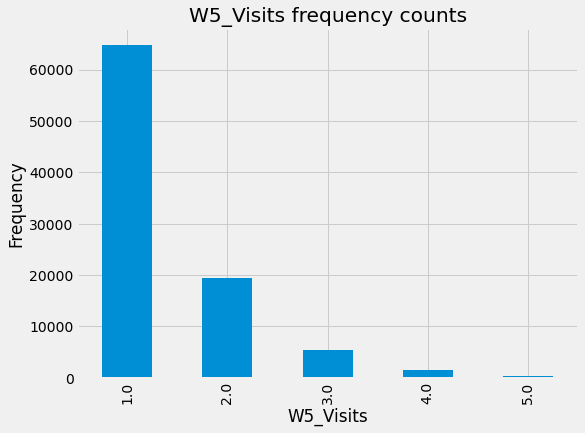

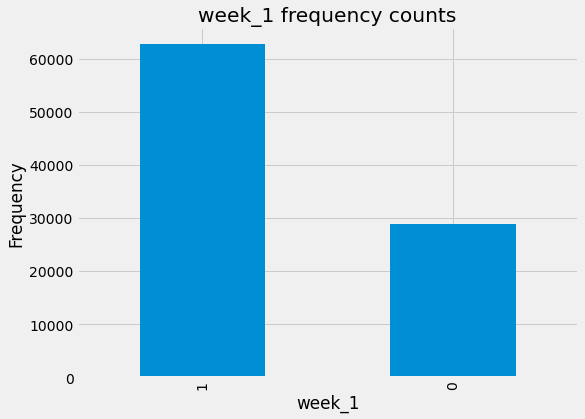

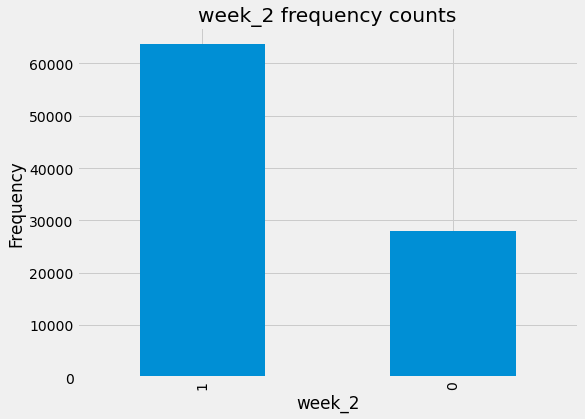

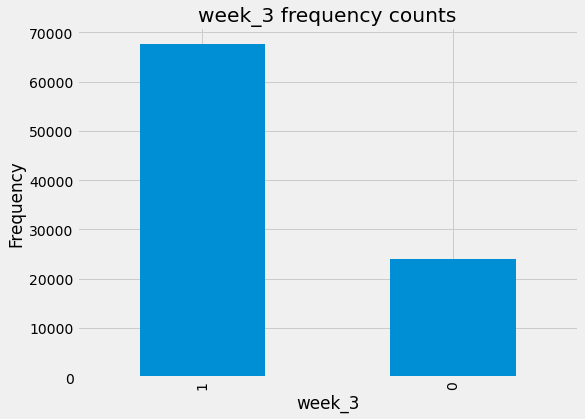

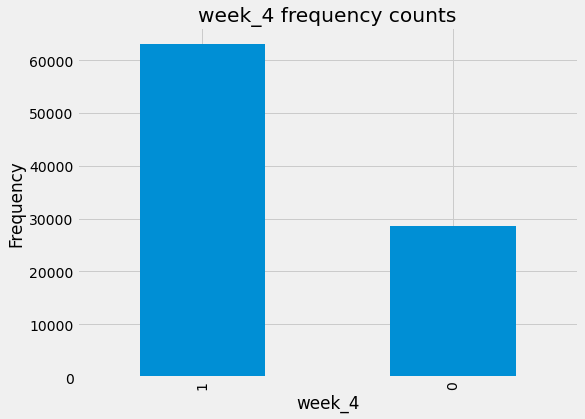

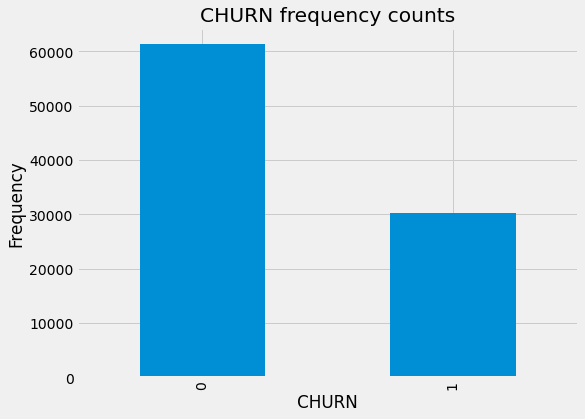

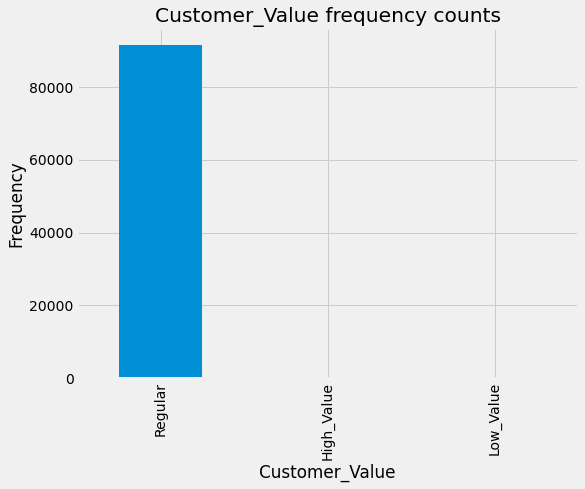

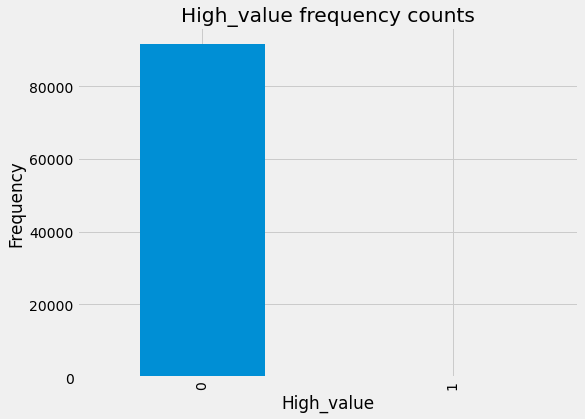

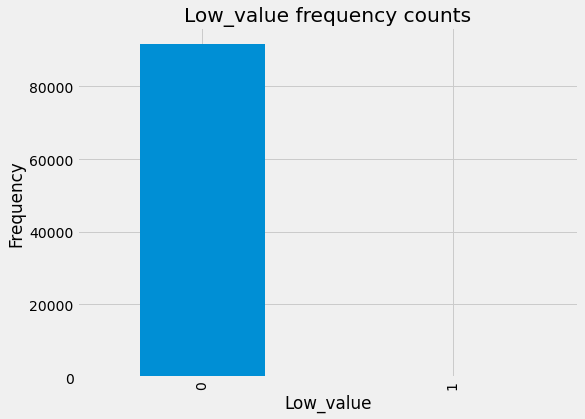

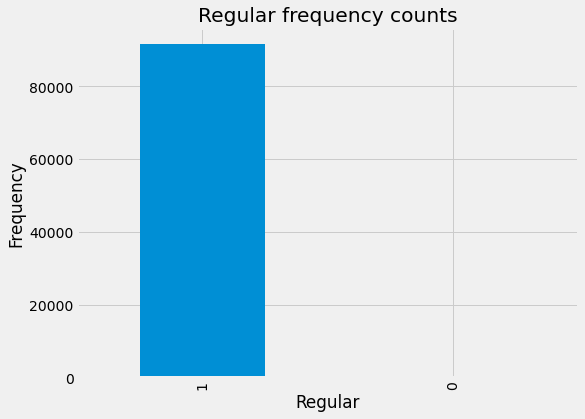

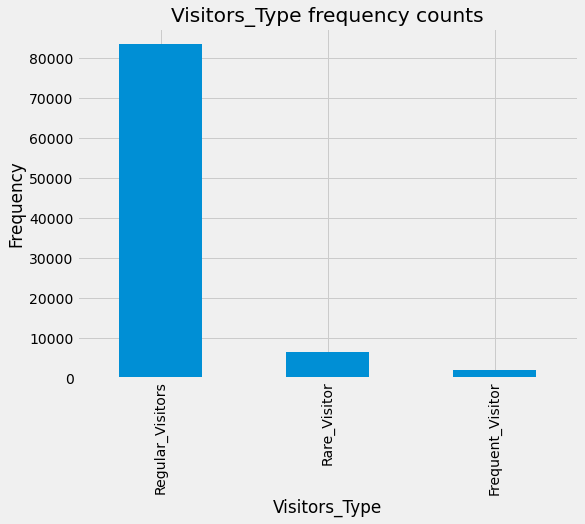

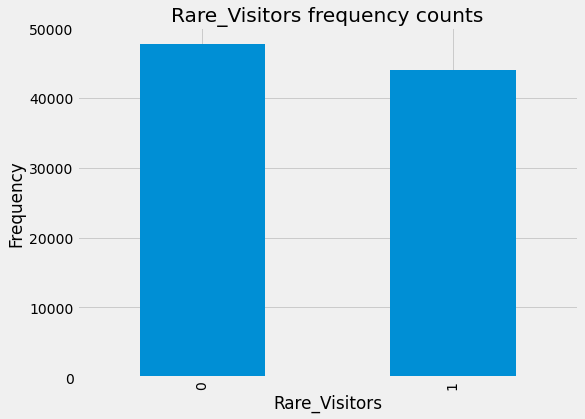

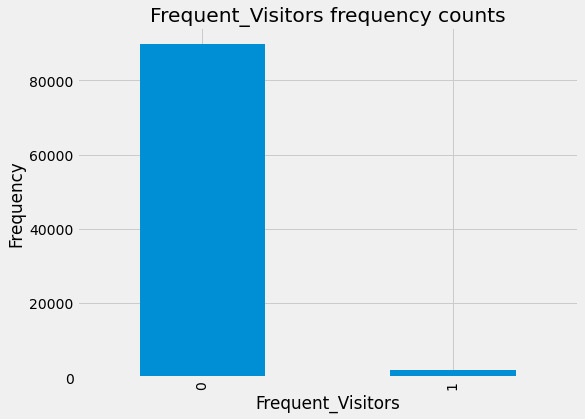

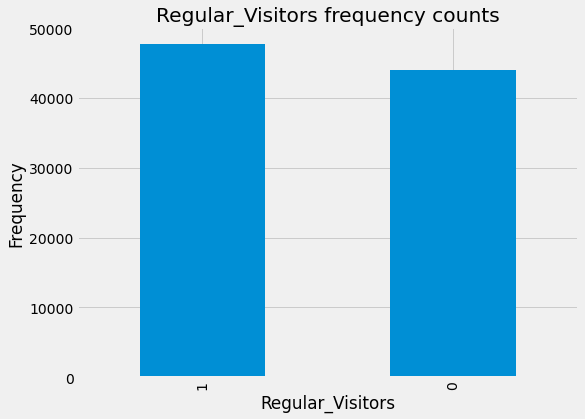

In [16]:
# Value counts 
for feature in cat_var:
    data = churn.copy()
    plt.figure(figsize = (8, 6))
    data[feature].value_counts().plot(kind = 'bar')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'{feature} frequency counts')
    plt.show()

### Categorical variables vs Target variable

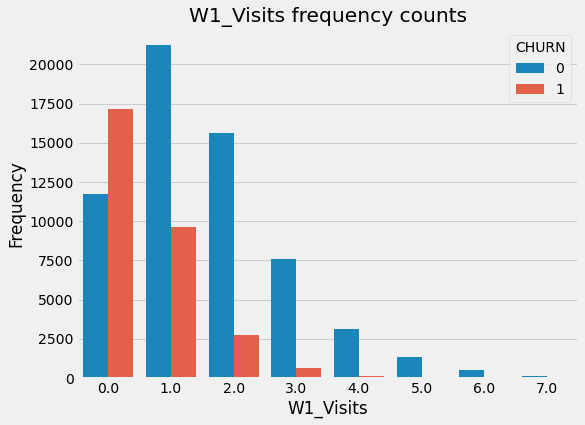

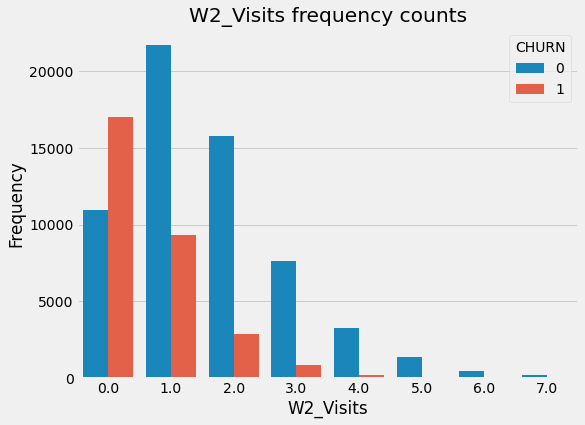

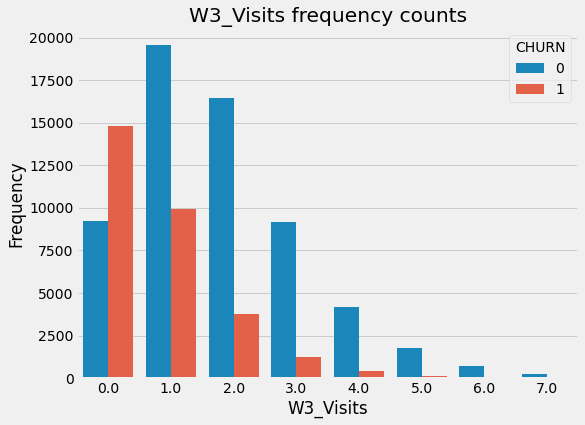

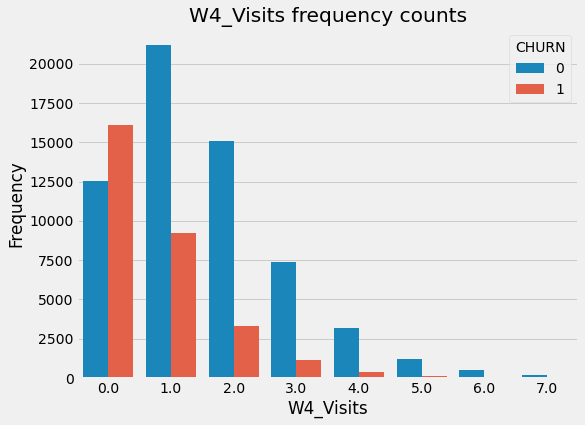

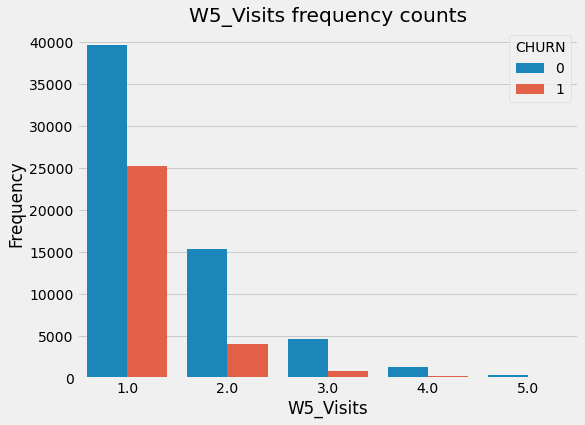

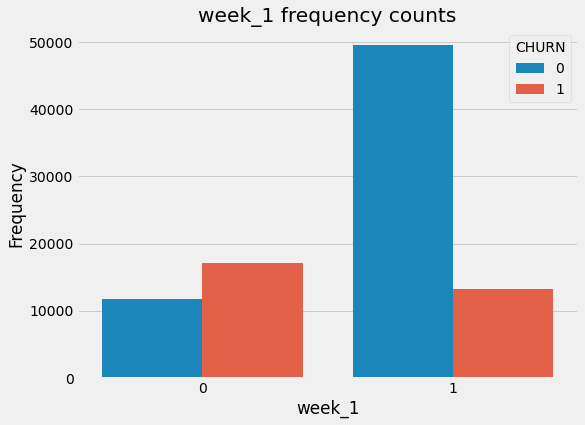

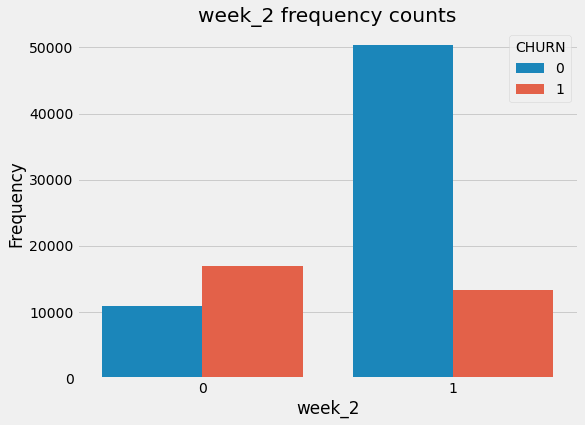

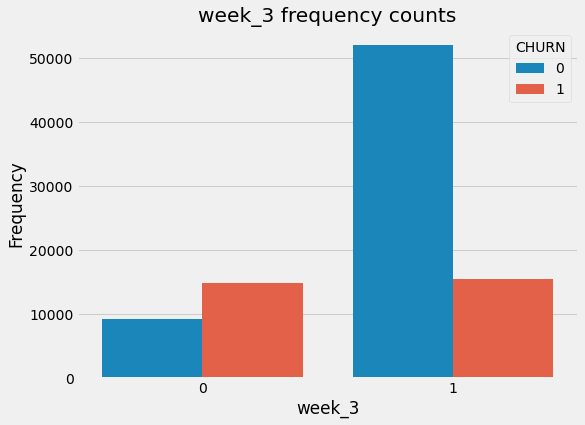

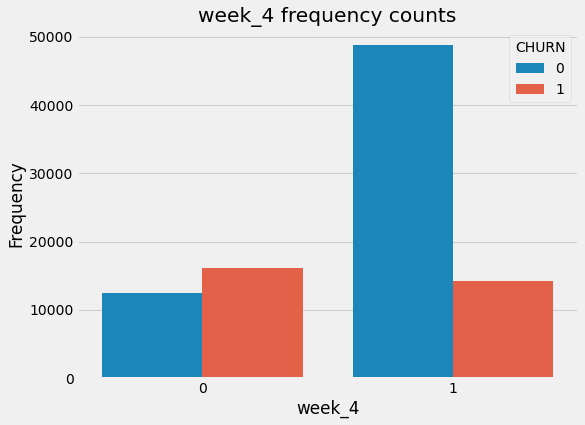

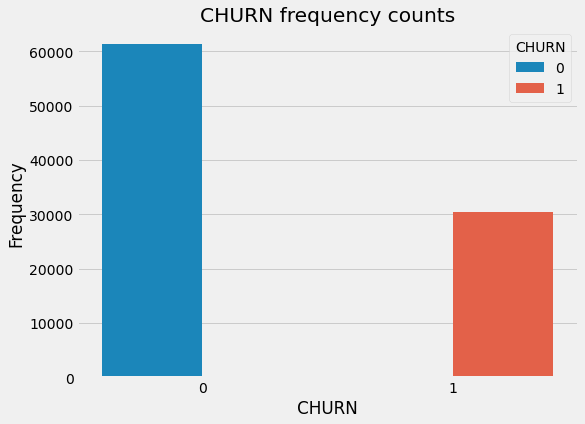

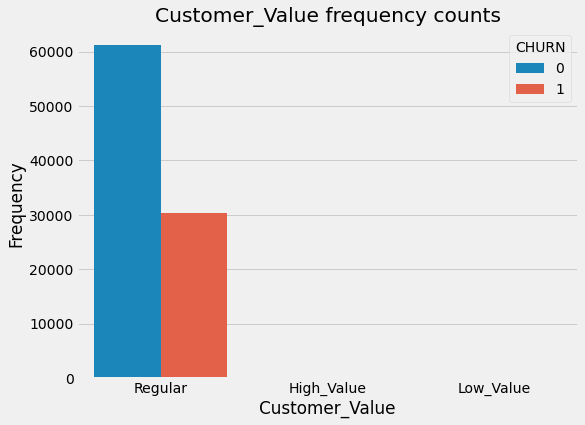

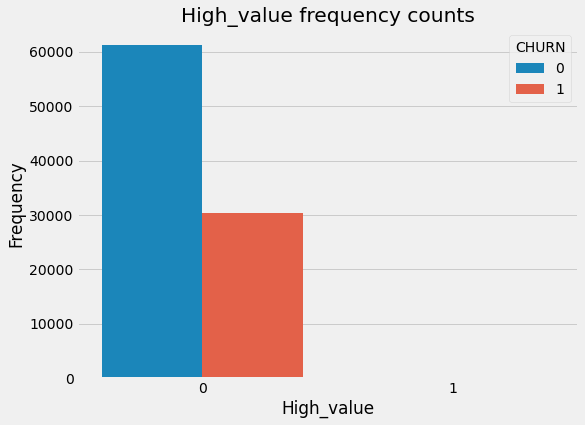

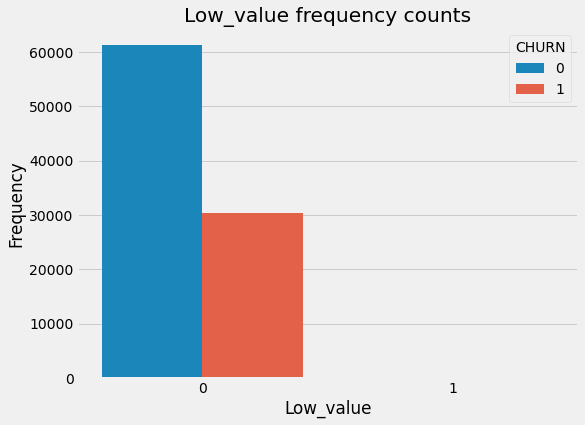

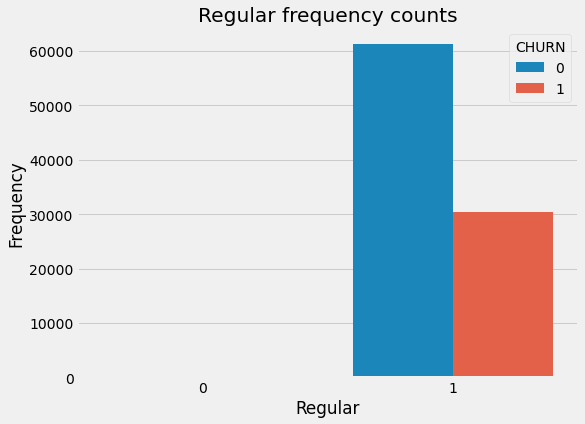

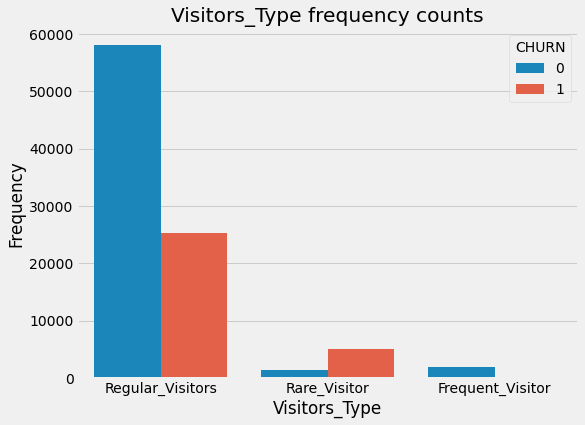

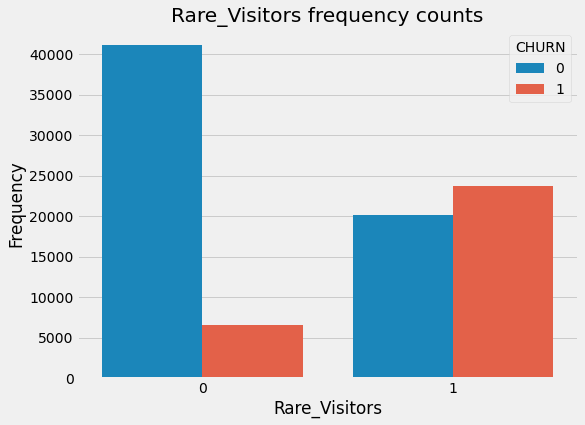

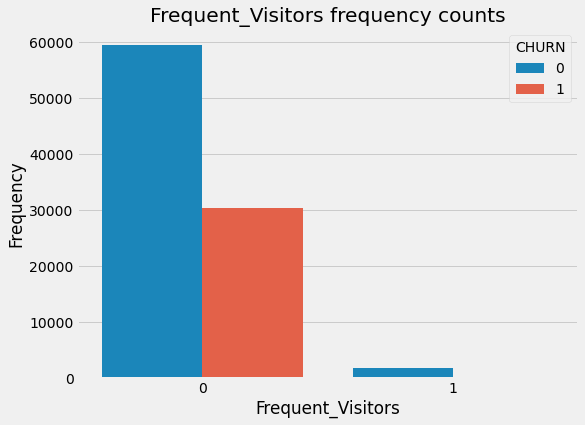

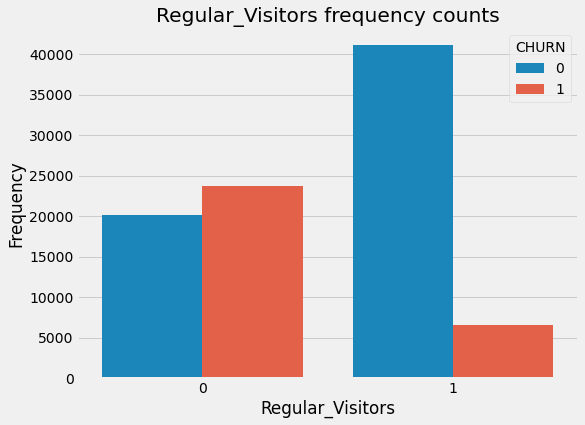

In [17]:
# Value counts 
for feature in cat_var:
    data = churn.copy()
    plt.figure(figsize = (8, 6))
    sns.countplot(x = feature, data=data, hue='CHURN')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'{feature} frequency counts')
    plt.show()

### Feature Engineering: Frequency encoding

In [18]:
churn.head()

CUSTOMER_ID  Total_Sale  STD_Sales  Hist_Visits  W1_Min_Sale  W1_STD_Sales  \
0         7260    7.585687   3.988061     2.708050     4.241039      3.958143   
1        11024    6.338523   3.163263     2.302585     3.958143      2.573045   
2        12476    5.043941   0.000000     1.386294     0.000000      0.000000   
3        14156    6.648207   3.670753     1.791759     5.148657      0.000000   
4        17606    5.838896   0.000000     1.098612     5.148657      0.000000   

   W1_Visits  W2_Min_Sale  W2_STD_Sales  W2_Visits   W3_Sale  W3_Max_Sale  \
0        4.0     4.926964      3.033436        3.0  6.243390     5.552184   
1        2.0     3.958143      0.000000        1.0  5.043941     3.958143   
2        0.0     3.958143      0.000000        1.0  3.958143     3.958143   
3        1.0     5.148657      0.000000        1.0  4.461300     4.461300   
4        1.0     0.000000      0.000000        0.0  0.000000     0.000000   

   W3_Min_Sale  W3_STD_Sales  W3_Visits   W4_Sale  W4_Min_Sale  W4_STD_Sales  \
0     4.461300        4.4613        4.0  5.552184     4.461300      4.119498   
1     3.958143        0.0000        3.0  5.148657     3.958143      3.900409   
2     3.958143        0.0000        1.0  0.000000     0.000000      0.000000   
3     4.461300        0.0000        1.0  5.148657     5.148657      0.000000   
4     0.000000        0.0000        0.0  0.000000     0.000000      0.000000   

   W4_Visits  W5_STD_Sales  W5_Visits  week_1  week_2  week_3  week_4  \
0        2.0           0.0        1.0       1       1       1       1   
1        2.0           0.0        1.0       1       1       1       1   
2        0.0           0.0        1.0       0       1       1       0   
3        1.0           0.0        1.0       1       1       1       1   
4        0.0           0.0        1.0       1       0       0       0   

        APV  Days_since_last_visit  CHURN Customer_Value  High_value  \
0  4.953208               0.000000      0        Regular           0   
1  4.155335               0.000000      1        Regular           0   
2  3.958143               2.639057      1        Regular           0   
3  5.043941               1.386294      0        Regular           0   
4  5.148657               1.609438      1        Regular           0   

   Low_value  Regular     Visitors_Type  Rare_Visitors  Frequent_Visitors  \
0          0        1  Regular_Visitors              0                  0   
1          0        1  Regular_Visitors              0                  0   
2          0        1  Regular_Visitors              1                  0   
3          0        1  Regular_Visitors              1                  0   
4          0        1  Regular_Visitors              1                  0   

   Regular_Visitors  
0                 1  
1                 1  
2                 0  
3                 0  
4                 0

In [19]:
# columns to encode
f_encode = ['Customer_Value', 'Visitors_Type']

In [20]:
# mapping dict values with for loop
for feature in f_encode:
    map_dict = churn[feature].value_counts().to_dict()
    churn[feature] = churn[feature].map(map_dict)

In [21]:
# drop CUSTOMER_ID 
churn.drop('CUSTOMER_ID', axis = 1, inplace = True)

In [22]:
churn.head()

Total_Sale  STD_Sales  Hist_Visits  W1_Min_Sale  W1_STD_Sales  W1_Visits  \
0    7.585687   3.988061     2.708050     4.241039      3.958143        4.0   
1    6.338523   3.163263     2.302585     3.958143      2.573045        2.0   
2    5.043941   0.000000     1.386294     0.000000      0.000000        0.0   
3    6.648207   3.670753     1.791759     5.148657      0.000000        1.0   
4    5.838896   0.000000     1.098612     5.148657      0.000000        1.0   

   W2_Min_Sale  W2_STD_Sales  W2_Visits   W3_Sale  W3_Max_Sale  W3_Min_Sale  \
0     4.926964      3.033436        3.0  6.243390     5.552184     4.461300   
1     3.958143      0.000000        1.0  5.043941     3.958143     3.958143   
2     3.958143      0.000000        1.0  3.958143     3.958143     3.958143   
3     5.148657      0.000000        1.0  4.461300     4.461300     4.461300   
4     0.000000      0.000000        0.0  0.000000     0.000000     0.000000   

   W3_STD_Sales  W3_Visits   W4_Sale  W4_Min_Sale  W4_STD_Sales  W4_Visits  \
0        4.4613        4.0  5.552184     4.461300      4.119498        2.0   
1        0.0000        3.0  5.148657     3.958143      3.900409        2.0   
2        0.0000        1.0  0.000000     0.000000      0.000000        0.0   
3        0.0000        1.0  5.148657     5.148657      0.000000        1.0   
4        0.0000        0.0  0.000000     0.000000      0.000000        0.0   

   W5_STD_Sales  W5_Visits  week_1  week_2  week_3  week_4       APV  \
0           0.0        1.0       1       1       1       1  4.953208   
1           0.0        1.0       1       1       1       1  4.155335   
2           0.0        1.0       0       1       1       0  3.958143   
3           0.0        1.0       1       1       1       1  5.043941   
4           0.0        1.0       1       0       0       0  5.148657   

   Days_since_last_visit  CHURN  Customer_Value  High_value  Low_value  \
0               0.000000      0           91635           0          0   
1               0.000000      1           91635           0          0   
2               2.639057      1           91635           0          0   
3               1.386294      0           91635           0          0   
4               1.609438      1           91635           0          0   

   Regular  Visitors_Type  Rare_Visitors  Frequent_Visitors  Regular_Visitors  
0        1          83488              0                  0                 1  
1        1          83488              0                  0                 1  
2        1          83488              1                  0                 0  
3        1          83488              1                  0                 0  
4        1          83488              1                  0                 0

In [23]:
# dependent and independent variable 
X = churn.drop('CHURN', axis = 1)
y = churn['CHURN']

In [24]:
# import trsin test split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 50)

In [25]:
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (68773, 34)
X_test shape:  (22925, 34)
y_train shape:  (68773,)
y_test shape:  (22925,)


### Feature Selection 


### Mutual info classification  
#### For categorical variables
- Mutual information measures the amount of information one can obtain from one random variable given another. It measures the average reduction in uncertainty about x that results from learning the value of y; or vice versa, the average amount of information that x conveys about y. 

- Mutual information is always larger than or equal to zero, where the larger the value, the greater the relationship between the two variables. If the calculated result is zero, then the variables are independent. 

- Source: Machinelearningmastery

In [26]:
cat_var = [feature for feature in churn.columns if churn[feature].nunique() <= 8 and feature != 'CHURN']
cat_var

['W1_Visits',
 'W2_Visits',
 'W3_Visits',
 'W4_Visits',
 'W5_Visits',
 'week_1',
 'week_2',
 'week_3',
 'week_4',
 'Customer_Value',
 'High_value',
 'Low_value',
 'Regular',
 'Visitors_Type',
 'Rare_Visitors',
 'Frequent_Visitors',
 'Regular_Visitors']

In [27]:
# import mutual info classification
from sklearn.feature_selection import mutual_info_classif 

# instantiate
mi_classif = mutual_info_classif(X_train[cat_var], y_train) 

# convert to Series
mi_classif = pd.Series(mi_classif) 

In [28]:
# add index columns
mi_classif.index = cat_var 

# sort from top to bottom 
mi_classif.sort_values(ascending = False)

W1_Visits            0.103558
Regular_Visitors     0.101379
Rare_Visitors        0.098841
W2_Visits            0.096437
W3_Visits            0.085462
week_2               0.082626
week_1               0.076522
W4_Visits            0.066611
week_3               0.066363
week_4               0.058628
Visitors_Type        0.050144
W5_Visits            0.026972
Customer_Value       0.010741
Frequent_Visitors    0.005221
Regular              0.003896
Low_value            0.002746
High_value           0.000000
dtype: float64

- drop featrures with low information gain

In [29]:
# columns to drop 
# drop 'Regular', 'Frequent_Visitors', 'Low_value', 'High_value'
churn.drop(['Frequent_Visitors', 'Customer_Value', 'Low_value', 'High_value'], axis = 1, inplace = True)

### Variance Threshold  


#### For numerical variables 

- Variance shows the variability in a distribution in a single metric. It shows how spread out the distribution is and shows the average squared distance from the mean. Distributions with bigger values yield a bigger variance because each difference is squared, but the main thing we care about in ML is that the distribution actually contains useful information

- Variance Thresholding technique is a quick and lightweight way of eliminating features with very low variance, i. e. features with not much useful information.

In [30]:
# list comprehension
num_var = [feature for feature in churn.columns if churn[feature]. nunique() > 9 and feature != 'CUSTOMER_ID']
num_var

['Total_Sale',
 'STD_Sales',
 'Hist_Visits',
 'W1_Min_Sale',
 'W1_STD_Sales',
 'W2_Min_Sale',
 'W2_STD_Sales',
 'W3_Sale',
 'W3_Max_Sale',
 'W3_Min_Sale',
 'W3_STD_Sales',
 'W4_Sale',
 'W4_Min_Sale',
 'W4_STD_Sales',
 'W5_STD_Sales',
 'APV',
 'Days_since_last_visit']

In [31]:
# import VarianceThreshold 
from sklearn.feature_selection import VarianceThreshold 

# instantiate 
vt = VarianceThreshold(threshold = 2)

# fit
vt.fit(churn[num_var])

VarianceThreshold(threshold=2)

In [32]:
vt.get_support()

array([False,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False])

In [33]:
# convert to Series
vt_var = pd.Series(vt.get_support())

# add column names as index
vt_var.index = num_var 

# print
vt_var

Total_Sale               False
STD_Sales                 True
Hist_Visits              False
W1_Min_Sale               True
W1_STD_Sales              True
W2_Min_Sale               True
W2_STD_Sales              True
W3_Sale                   True
W3_Max_Sale               True
W3_Min_Sale               True
W3_STD_Sales              True
W4_Sale                   True
W4_Min_Sale               True
W4_STD_Sales              True
W5_STD_Sales              True
APV                      False
Days_since_last_visit    False
dtype: bool

- drop feature with low variance i.e the features that returned 'False'

In [34]:
# columns to drop 
# drop 'Total_Sale', 'STD_Sales', 'APV', 'Days_since_last_visit'
churn.drop(['Total_Sale', 'STD_Sales', 'APV', 'Days_since_last_visit'], axis = 1, inplace = True)

In [35]:
churn.columns

Index(['Hist_Visits', 'W1_Min_Sale', 'W1_STD_Sales', 'W1_Visits',
       'W2_Min_Sale', 'W2_STD_Sales', 'W2_Visits', 'W3_Sale', 'W3_Max_Sale',
       'W3_Min_Sale', 'W3_STD_Sales', 'W3_Visits', 'W4_Sale', 'W4_Min_Sale',
       'W4_STD_Sales', 'W4_Visits', 'W5_STD_Sales', 'W5_Visits', 'week_1',
       'week_2', 'week_3', 'week_4', 'CHURN', 'Regular', 'Visitors_Type',
       'Rare_Visitors', 'Regular_Visitors'],
      dtype='object')

### Split the dataset

In [36]:
# dependent and independent variable 
X = churn.drop('CHURN', axis = 1)
y = churn['CHURN']

In [37]:
# import trsin test split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 50)

In [38]:
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (68773, 26)
X_test shape:  (22925, 26)
y_train shape:  (68773,)
y_test shape:  (22925,)


In [39]:
X_train.head()

Hist_Visits  W1_Min_Sale  W1_STD_Sales  W1_Visits  W2_Min_Sale  \
43059     1.945910     4.109562      2.952747        2.0     0.000000   
33516     2.944439     4.461300      0.000000        3.0     3.958143   
50020     0.693147     0.000000      0.000000        0.0     0.000000   
71483     1.791759     4.109562      0.000000        1.0     0.000000   
60267     1.098612     0.000000      0.000000        0.0     3.958143   

       W2_STD_Sales  W2_Visits   W3_Sale  W3_Max_Sale  W3_Min_Sale  \
43059      0.000000        0.0  0.000000       0.0000     0.000000   
33516      3.033436        4.0  5.978278       4.4613     3.958143   
50020      0.000000        0.0  0.000000       0.0000     0.000000   
71483      0.000000        0.0  4.461300       4.4613     4.461300   
60267      0.000000        1.0  0.000000       0.0000     0.000000   

       W3_STD_Sales  W3_Visits   W4_Sale  W4_Min_Sale  W4_STD_Sales  \
43059      0.000000        0.0  4.963516     4.051715      3.071750   
33516      2.791937        5.0  5.616480     3.958143      3.033436   
50020      0.000000        0.0  0.000000     0.000000      0.000000   
71483      0.000000        1.0  4.241039     4.241039      0.000000   
60267      0.000000        0.0  0.000000     0.000000      0.000000   

       W4_Visits  W5_STD_Sales  W5_Visits  week_1  week_2  week_3  week_4  \
43059        2.0      2.573045        2.0       1       0       0       1   
33516        4.0      0.000000        2.0       1       1       1       1   
50020        0.0      0.000000        1.0       0       0       0       0   
71483        1.0      0.000000        2.0       1       0       1       1   
60267        0.0      0.000000        1.0       0       1       0       0   

       Regular  Visitors_Type  Rare_Visitors  Regular_Visitors  
43059        1          83488              0                 1  
33516        1          83488              0                 1  
50020        1           6323              1                 0  
71483        1          83488              1                 0  
60267        1          83488              1                 0

### Standardization

In [40]:
# import StandardScaler 
from sklearn.preprocessing import StandardScaler 

# instantiate 
sts = StandardScaler()

# fit and transform X_train
X_train = sts.fit_transform(X_train)

# fit and transform X_test
X_test = sts.fit_transform(X_test)

In [41]:
X_train

array([[ 0.12092024,  0.4183577 ,  1.33667152, ...,  0.31347723,
        -0.95867103,  0.95867103],
       [ 1.78685108,  0.57717939, -0.5142454 , ...,  0.31347723,
        -0.95867103,  0.95867103],
       [-1.96917112, -1.43724782, -0.5142454 , ..., -3.14233883,
         1.04311069, -1.04311069],
       ...,
       [ 0.54020954,  0.72761576, -0.5142454 , ...,  0.31347723,
        -0.95867103,  0.95867103],
       [-1.96917112, -1.43724782, -0.5142454 , ..., -3.14233883,
         1.04311069, -1.04311069],
       [ 2.43379341,  0.3499871 ,  2.02865088, ..., -3.34100403,
        -0.95867103,  0.95867103]])

### Modelling

In [42]:
# import LogisticRegression 
from sklearn.linear_model import LogisticRegression 

# insatntiate
log_reg = LogisticRegression()
# class_weight = {0 : 0.3, 1 : 0.7}
# train 
log_reg.fit(X_train, y_train)

C:\Users\OJO Timilehin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [43]:
# predict 
y_pred = log_reg.predict(X_test)

In [44]:
results = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred}) 
results.head()

Actual  Predicted
16888       0          1
2991        1          0
41792       0          0
74931       1          1
60573       0          0

### Model Evaluation

In [45]:
log_reg.score(X_train, y_train)

0.7647332528754017

In [46]:
log_reg.score(X_test, y_test)

0.7627480916030535

In [47]:
from sklearn.metrics import confusion_matrix, classification_report

In [48]:
confusion_matrix(y_pred, y_test)

array([[13109,  3271],
       [ 2168,  4377]], dtype=int64)

<AxesSubplot:>

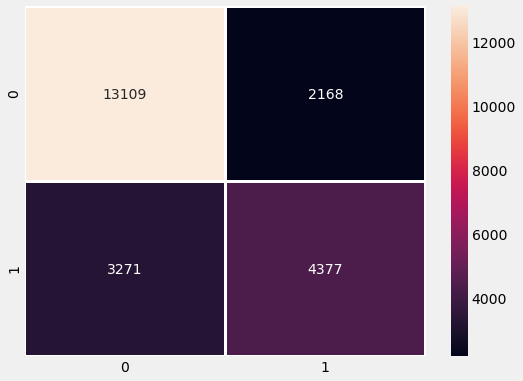

In [59]:
# confusion matrix
plt.figure(figsize = (8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, linewidth = 2, fmt = 'd')

In [61]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83     15277
           1       0.67      0.57      0.62      7648

    accuracy                           0.76     22925
   macro avg       0.73      0.72      0.72     22925
weighted avg       0.76      0.76      0.76     22925



### ROC-AUC Curve

In [51]:
pred_prob = log_reg.predict_proba(X_test)[:, 1]
pred_prob

array([0.56935538, 0.35267397, 0.06221503, ..., 0.03532595, 0.78815478,
       0.52314425])

In [52]:
from sklearn.metrics import roc_curve, roc_auc_score

false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, pred_prob, pos_label = 1)

In [53]:
roc_auc_score(y_test, pred_prob)

0.8168908216689129

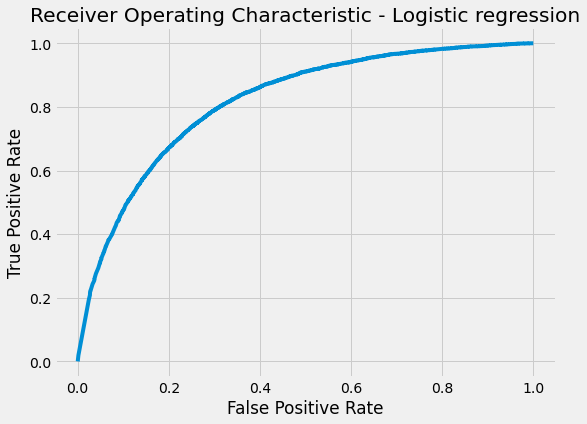

In [54]:
plt.figure(figsize = (8, 6))
plt.plot(false_positive_rate1, true_positive_rate1)
plt.title('Receiver Operating Characteristic - Logistic regression')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [55]:
# coefficients
log_reg.coef_

array([[ 0.59999083,  0.5304648 ,  0.1139839 , -0.79105533, -0.15640226,
        -0.03590488, -0.39390553, -2.68434001,  1.26372662,  0.65680601,
         0.00956076,  0.35990681, -1.87920567,  1.08051479,  0.07910195,
         0.3060567 , -0.03704608, -0.08948502, -0.65546982, -0.18396926,
        -0.02011475,  0.15446   , -0.03829538, -0.04624649,  0.01107146,
        -0.01107146]])

In [66]:
# convert to dataframe
coeff = pd.DataFrame(log_reg.coef_).T 

# add columns name as index
coeff.index = X.columns 

# print
coeff.rename(columns = {0 : 'coefficients'}, inplace=True)

In [70]:
coeff.sort_values('coefficients', ascending = False)

coefficients
W3_Max_Sale           1.263727
W4_Min_Sale           1.080515
W3_Min_Sale           0.656806
Hist_Visits           0.599991
W1_Min_Sale           0.530465
W3_Visits             0.359907
W4_Visits             0.306057
week_4                0.154460
W1_STD_Sales          0.113984
W4_STD_Sales          0.079102
Rare_Visitors         0.011071
W3_STD_Sales          0.009561
Regular_Visitors     -0.011071
week_3               -0.020115
W2_STD_Sales         -0.035905
W5_STD_Sales         -0.037046
Regular              -0.038295
Visitors_Type        -0.046246
W5_Visits            -0.089485
W2_Min_Sale          -0.156402
week_2               -0.183969
W2_Visits            -0.393906
week_1               -0.655470
W1_Visits            -0.791055
W4_Sale              -1.879206
W3_Sale              -2.684340

In [56]:
# intercept
log_reg.intercept_

array([-1.03428485])

In [57]:
log_reg.n_features_in_

26

In [58]:
log_reg.n_iter_

array([100])

### Modelling: Support Vector Machine

In [71]:
# import SVC
from sklearn.svm import SVC 

# instantiate
svc_clf = SVC(kernel = 'rbf')

# train
svc_clf.fit(X_train, y_train)

SVC()

In [72]:
# predict
svc_y_pred = svc_clf.predict(X_test)

### Model Evaluation

In [73]:
# R2 score
svc_clf.score(X_train, y_train)

0.7674668838061448

In [74]:
# R2 score
svc_clf.score(X_test, y_test)

0.7624427480916031

In [75]:
confusion_matrix(y_test, svc_y_pred)

array([[13138,  2139],
       [ 3307,  4341]], dtype=int64)

<AxesSubplot:>

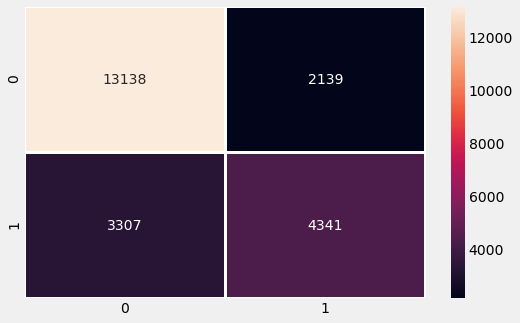

In [76]:
# heatmap
plt.figure(figsize = (8, 5))
sns.heatmap(confusion_matrix(y_test, svc_y_pred), annot = True, fmt = 'd', linewidth = 2)

In [ ]:
print(classification_report(y_test, svc_y_pred))